## When Rain Returns: A Climate Forecast of Hope
### Objective: Explore rainfall changes in six Saudi cities (2005-2024), build a predictive model for 2030 under two scenarios:
- Scenario A: Continuation of current trends
- Scenario B: Improvement via Saudi Green Initiative (SGI)

# Project Overview
#### - Data cleaning & preparation
#### - Exploratory analysis & visualization
#### - Predictive modeling (Linear Regression) - Scenario simulation & storytelling

# Team Roles
- Leader: Coordination & scenario design
- Member 1: Data cleaning
- Member 2: Time series analysis & plots
- Member 3: Model training & forecasting
- Member 4: Presentation design & narrative

#### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import plotly.express as px
from sklearn.metrics import mean_squared_error, mean_absolute_error
from darts.models import AutoARIMA, Prophet, TBATS

In [84]:
import darts
print(f"Darts version: {darts.__version__}")

Darts version: 0.30.0


## 📥 Step 1: Load & Clean Data
We began by importing the dataset and handling missing or erroneous precipitation values. This step ensures reliable input for modeling.

In [85]:
# Load Dataset
df = pd.read_csv('all_cleand_dataset.csv')

In [86]:
df['precipitation_filled'] = df['precipitation_filled'].replace([99.99, 100.0], np.nan)
df['precipitation_filled'] = df['precipitation_filled'].fillna(method='ffill')

In [87]:
print(df.shape)
df.head()

(21866, 4)


,DATE_ONLY,City,AIR_TEMPERATURE,precipitation_filled
0,2022-01-01,Jeddah,25.833333,0.0
1,2022-01-02,Jeddah,22.722222,0.0
2,2022-01-03,Jeddah,21.500000,0.0
3,2022-01-04,Jeddah,23.777778,0.0
4,2022-01-05,Jeddah,24.777778,0.0


In [88]:
df.sort_values(by='DATE_ONLY')

,DATE_ONLY,City,AIR_TEMPERATURE,precipitation_filled
9825,2005-01-01,Hail,12.777778,0.0
7645,2005-01-01,Jeddah,22.611111,0.0
2180,2005-01-01,Riyadh,13.388889,0.0
2181,2005-01-02,Riyadh,15.611111,0.0
7646,2005-01-02,Jeddah,25.388889,0.0
...,...,...,...,...
5086,2024-12-30,Jeddah,23.277778,0.0
2178,2024-12-30,Hail,11.944444,0.0
5087,2024-12-31,Jeddah,22.611111,0.0
9459,2024-12-31,Riyadh,15.333333,0.0


In [89]:
df.duplicated().sum()

0

In [90]:
df.isnull().sum()

DATE_ONLY               0
City                    0
AIR_TEMPERATURE         0
precipitation_filled    0
dtype: int64

In [91]:
df.isna().sum()

DATE_ONLY               0
City                    0
AIR_TEMPERATURE         0
precipitation_filled    0
dtype: int64

In [92]:
df.shape

(21866, 4)










# Step 2 - 📊 Explore Data

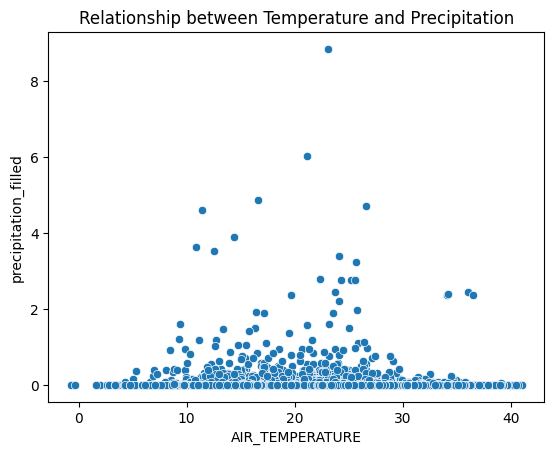

In [ ]:
sns.scatterplot(x='AIR_TEMPERATURE', y='precipitation_filled', data=df)
plt.title('Relationship between Temperature and Precipitation')
plt.show()

In [93]:
df_riyadh =df[df['City']=='Riyadh']
df_riyadh

,DATE_ONLY,City,AIR_TEMPERATURE,precipitation_filled
1095,2007-01-01,Riyadh,7.388889,0.0
1096,2007-01-02,Riyadh,6.444444,0.0
1097,2007-01-03,Riyadh,6.500000,0.0
1098,2007-01-04,Riyadh,7.500000,0.0
1099,2007-01-05,Riyadh,10.555556,0.0
...,...,...,...,...
20034,2014-12-27,Riyadh,16.833333,0.0
20035,2014-12-28,Riyadh,18.388889,0.0
20036,2014-12-29,Riyadh,18.777778,0.0
20037,2014-12-30,Riyadh,17.055556,0.0


In [94]:
df_subset_rdh = df_riyadh[["precipitation_filled","DATE_ONLY"]]
df_subset_rdh

,precipitation_filled,DATE_ONLY
1095,0.0,2007-01-01
1096,0.0,2007-01-02
1097,0.0,2007-01-03
1098,0.0,2007-01-04
1099,0.0,2007-01-05
...,...,...
20034,0.0,2014-12-27
20035,0.0,2014-12-28
20036,0.0,2014-12-29
20037,0.0,2014-12-30


In [95]:
df_subset_rdh.sort_values(by='DATE_ONLY')

,precipitation_filled,DATE_ONLY
2180,0.0,2005-01-01
2181,0.0,2005-01-02
2182,0.0,2005-01-03
2183,0.0,2005-01-04
2184,0.0,2005-01-05
...,...,...
9455,0.0,2024-12-27
9456,0.0,2024-12-28
9457,0.0,2024-12-29
9458,0.0,2024-12-30


In [96]:
df_subset_rdh.dtypes

precipitation_filled    float64
DATE_ONLY                object
dtype: object

In [97]:
df_subset_rdh

,precipitation_filled,DATE_ONLY
1095,0.0,2007-01-01
1096,0.0,2007-01-02
1097,0.0,2007-01-03
1098,0.0,2007-01-04
1099,0.0,2007-01-05
...,...,...
20034,0.0,2014-12-27
20035,0.0,2014-12-28
20036,0.0,2014-12-29
20037,0.0,2014-12-30


In [98]:
df_subset_rdh['DATE_ONLY'] = pd.to_datetime(df_subset_rdh['DATE_ONLY'])

/var/folders/b3/gz03kggn04xb1pcw74r123ym0000gn/T/ipykernel_37809/2169186513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset_rdh['DATE_ONLY'] = pd.to_datetime(df_subset_rdh['DATE_ONLY'])


In [99]:
df_subset_rdh.dtypes

precipitation_filled           float64
DATE_ONLY               datetime64[ns]
dtype: object

In [100]:
rdy_filtered = df_subset_rdh.loc[(df_subset_rdh['DATE_ONLY'] >= '2009-01-01') & (df_subset_rdh['DATE_ONLY'] <= '2024-12-31')]

In [101]:
rdy_filtered = rdy_filtered.sort_values(by='DATE_ONLY')

In [102]:
rdy_filtered_week = rdy_filtered.set_index('DATE_ONLY')

In [103]:
rdy_filtered_week = rdy_filtered_week.resample('W').sum().reset_index()

In [104]:
df_jed = df[df['City']=='Jeddah']
df_jed

,DATE_ONLY,City,AIR_TEMPERATURE,precipitation_filled
0,2022-01-01,Jeddah,25.833333,0.0
1,2022-01-02,Jeddah,22.722222,0.0
2,2022-01-03,Jeddah,21.500000,0.0
3,2022-01-04,Jeddah,23.777778,0.0
4,2022-01-05,Jeddah,24.777778,0.0
...,...,...,...,...
21861,2019-12-27,Jeddah,22.222222,0.0
21862,2019-12-28,Jeddah,22.388889,0.0
21863,2019-12-29,Jeddah,22.555556,0.0
21864,2019-12-30,Jeddah,23.500000,0.0


In [105]:
df_subset_jed = df_jed[["precipitation_filled","DATE_ONLY"]]
df_subset_jed

,precipitation_filled,DATE_ONLY
0,0.0,2022-01-01
1,0.0,2022-01-02
2,0.0,2022-01-03
3,0.0,2022-01-04
4,0.0,2022-01-05
...,...,...
21861,0.0,2019-12-27
21862,0.0,2019-12-28
21863,0.0,2019-12-29
21864,0.0,2019-12-30


In [106]:
df_subset_jed.sort_values(by='DATE_ONLY')

,precipitation_filled,DATE_ONLY
7645,0.0,2005-01-01
7646,0.0,2005-01-02
7647,0.0,2005-01-03
7648,0.0,2005-01-04
7649,0.0,2005-01-05
...,...,...
5083,0.0,2024-12-27
5084,0.0,2024-12-28
5085,0.0,2024-12-29
5086,0.0,2024-12-30


In [107]:
df_subset_jed['DATE_ONLY'] = pd.to_datetime(df_subset_jed['DATE_ONLY'])

/var/folders/b3/gz03kggn04xb1pcw74r123ym0000gn/T/ipykernel_37809/109766819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset_jed['DATE_ONLY'] = pd.to_datetime(df_subset_jed['DATE_ONLY'])


In [108]:
df_subset_jed.dtypes

precipitation_filled           float64
DATE_ONLY               datetime64[ns]
dtype: object

In [109]:
jed_filtered = df_subset_jed.loc[(df_subset_jed['DATE_ONLY'] >= '2009-01-01') & (df_subset_jed['DATE_ONLY'] <= '2024-12-31')]

In [110]:
jed_filtered = jed_filtered.sort_values(by='DATE_ONLY')

In [111]:
jed_filtered_week = jed_filtered.set_index('DATE_ONLY')

In [112]:
jed_filtered_week = jed_filtered_week.resample('W').sum().reset_index()

In [113]:
jed_filtered_week

,DATE_ONLY,precipitation_filled
0,2009-01-04,0.00
1,2009-01-11,0.00
2,2009-01-18,0.00
3,2009-01-25,0.00
4,2009-02-01,0.00
...,...,...
831,2024-12-08,0.00
832,2024-12-15,0.00
833,2024-12-22,0.08
834,2024-12-29,0.00


# Step 3 -  🤖 Build Forecasting Model

Use time series forecasting models (Prophet and/or ARIMA) to predict climate variables for the year 2030:
- Train the models on historical data from 2005 to 2024.
- Scenario A: Base trend, assuming the continuation of current climate conditions without intervention.
- Scenario B: Improved trend, simulating environmental initiatives that would lead to a decrease in temperature and an increase in precipitation, reflecting potential improvements in overall climate conditions by 2030.

### 1. Prophet Model

In [ ]:
df_riyadh = df[['DATE_ONLY', 'precipitation_filled']]

In [ ]:
df_riyadh = df[['DATE_ONLY', 'precipitation_filled']].rename(columns={'DATE_ONLY': 'ds', 'precipitation_filled': 'y'})

In [ ]:
df_riyadh.sort_values(by='ds',inplace=True)

In [ ]:
df_riyadh['ds'] = pd.to_datetime(df_riyadh['ds'])
df_riyadh.head()

,ds,y
9825,2005-01-01,0.0
7645,2005-01-01,0.0
2180,2005-01-01,0.0
2181,2005-01-02,0.0
7646,2005-01-02,0.0


In [ ]:
df_filtered = df_riyadh[(df_riyadh['ds'] >= '2009-01-01') & (df_riyadh['ds'] <= '2024-12-31')]
df_filtered.tail()

,ds,y
5086,2024-12-30,0.0
2178,2024-12-30,0.0
5087,2024-12-31,0.0
9459,2024-12-31,0.0
2179,2024-12-31,0.0


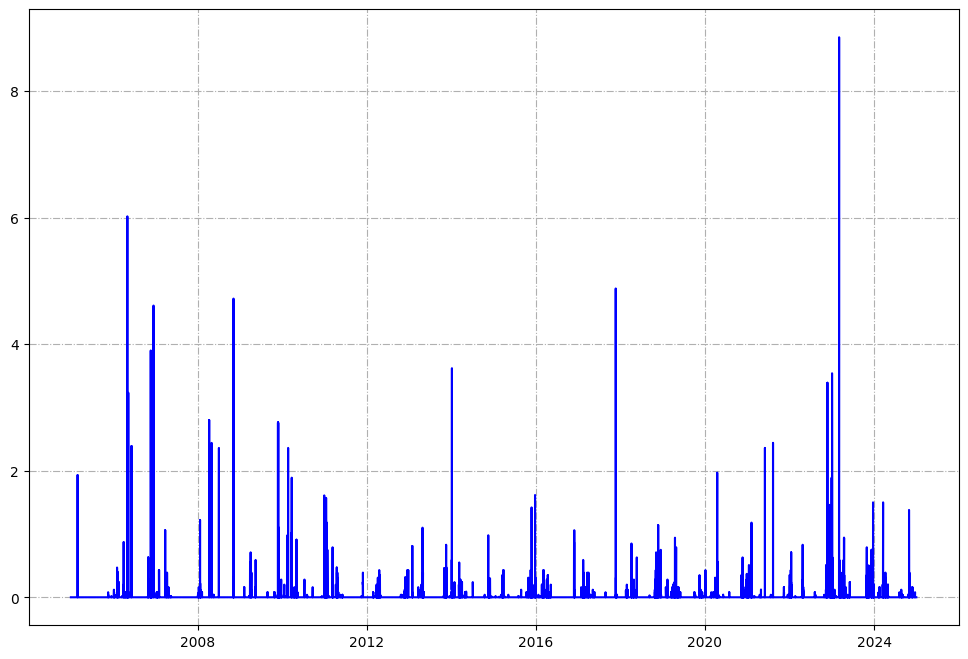

In [ ]:
plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')
plt.plot(df_riyadh['ds'], df_riyadh['y'], 'b')
plt.show()

In [ ]:
train_size = int(0.8 * len(df))  
train_rdh = df_riyadh.iloc[:train_size]
test_rdh = df_riyadh.iloc[train_size:]

In [ ]:
train_rdh.shape, test_rdh.shape

((17492, 2), (4374, 2))

In [ ]:
from prophet import Prophet
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model.fit(train_rdh)

17:33:18 - cmdstanpy - INFO - Chain [1] start processing
17:33:29 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
from prophet import Prophet
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model.fit(train_rdh)

17:33:18 - cmdstanpy - INFO - Chain [1] start processing
17:33:29 - cmdstanpy - INFO - Chain [1] done processing


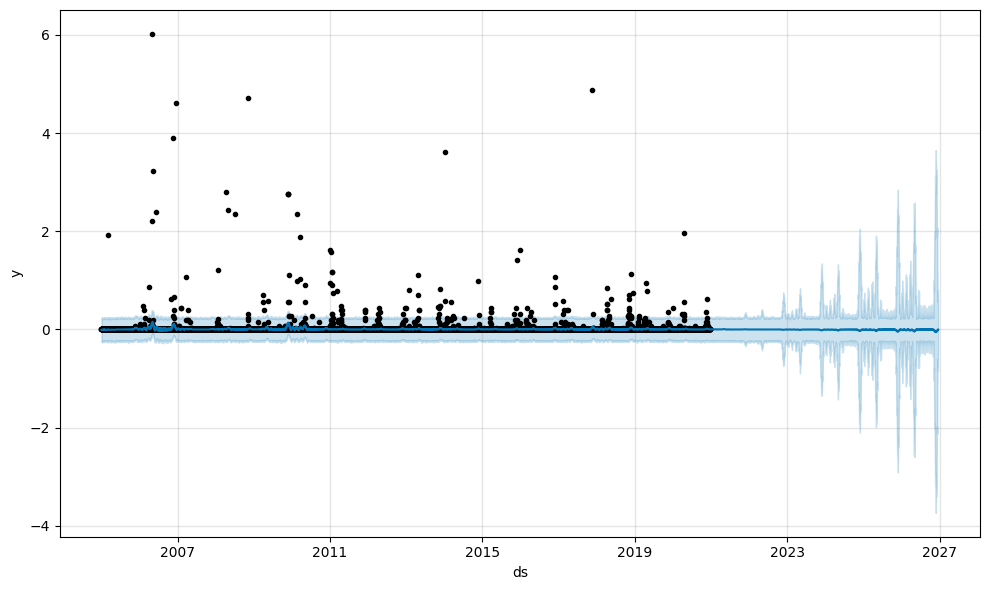

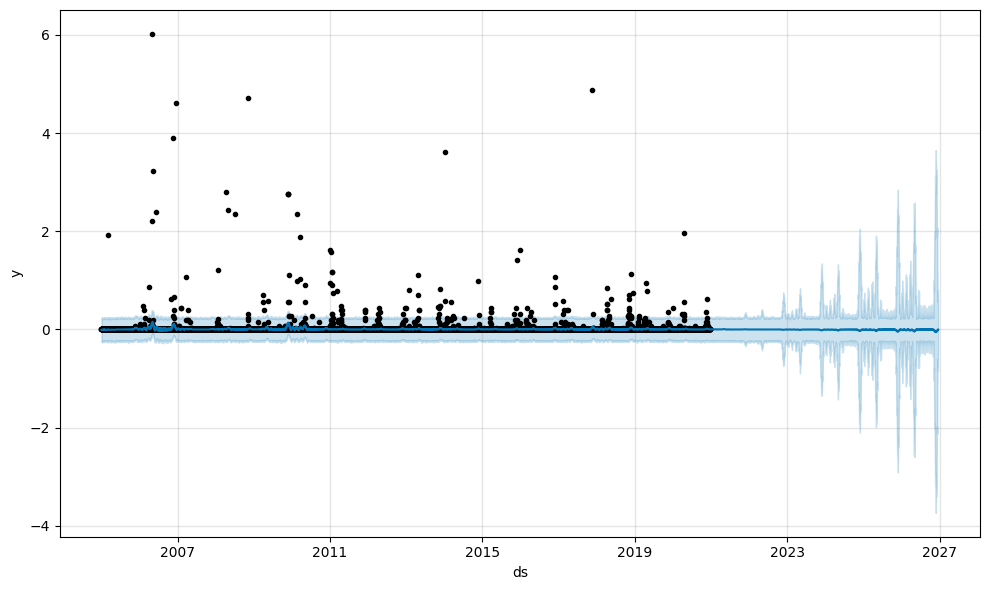

In [ ]:
figr= model.plot(forecast);
figr

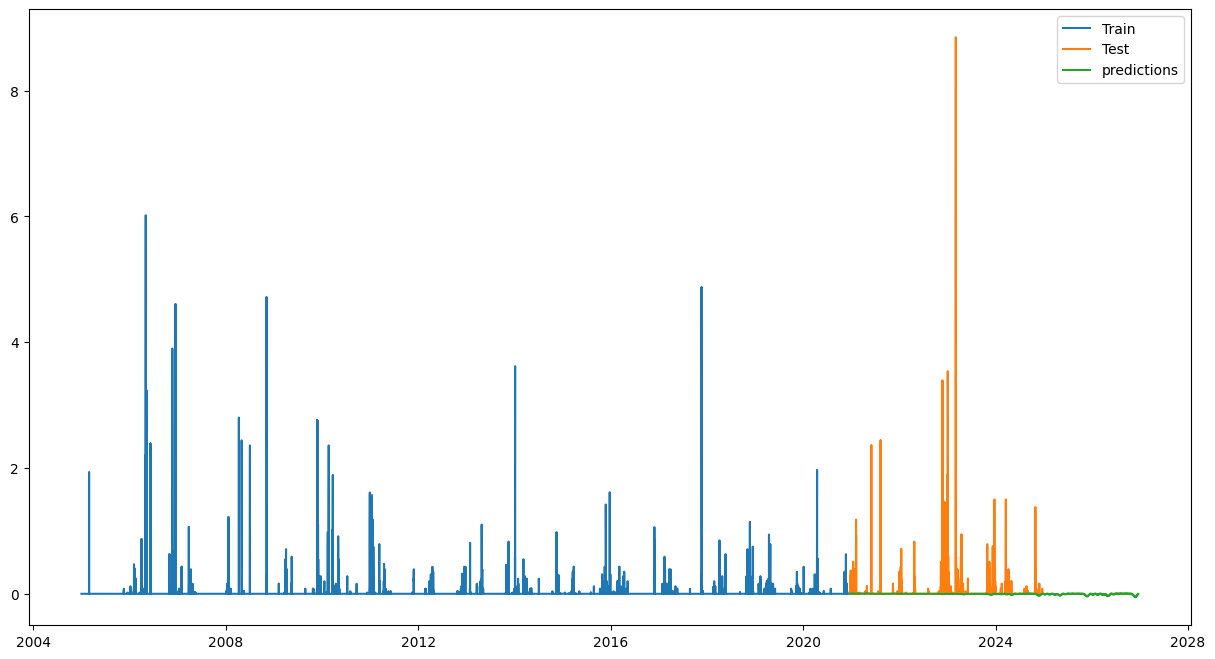

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(train_rdh['ds'], train_rdh['y'], label="Train")
plt.plot(test_rdh['ds'], test_rdh['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

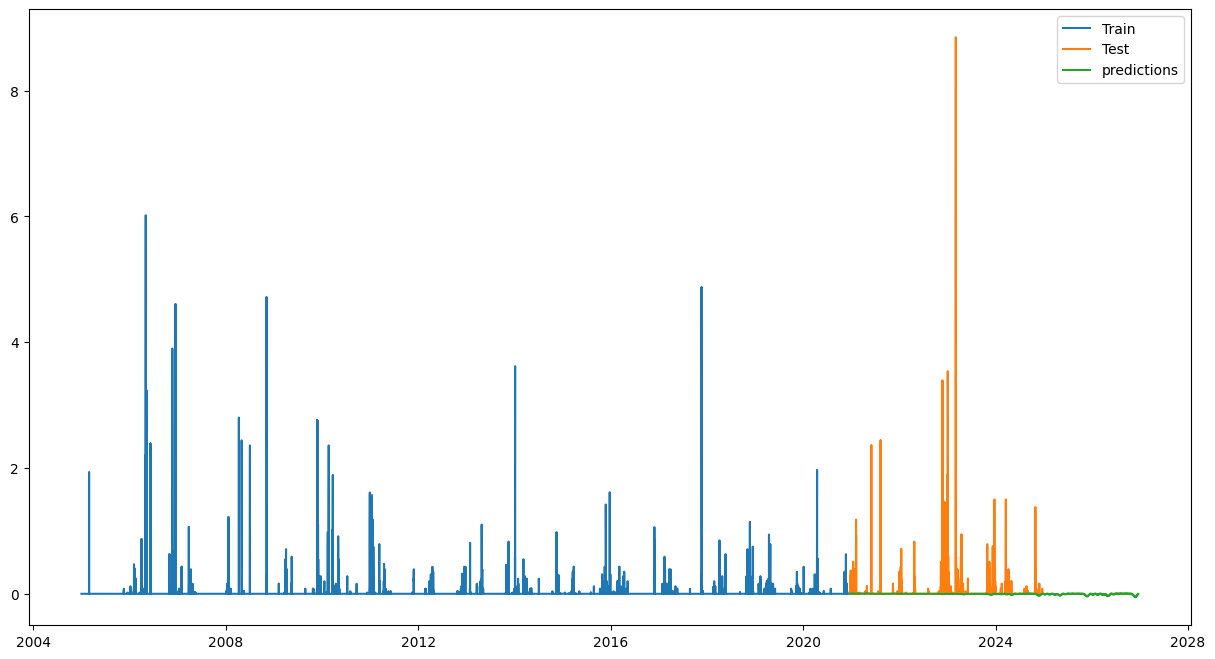

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(train_rdh['ds'], train_rdh['y'], label="Train")
plt.plot(test_rdh['ds'], test_rdh['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

In [ ]:
from prophet.diagnostics import cross_validation

cv_results = cross_validation(model,initial= '1825 days' ,period='365 days',horizon='2190 days') 

  0%|          | 0/5 [00:00<?, ?it/s]

17:33:33 - cmdstanpy - INFO - Chain [1] start processing
17:33:35 - cmdstanpy - INFO - Chain [1] done processing
17:33:37 - cmdstanpy - INFO - Chain [1] start processing
17:33:40 - cmdstanpy - INFO - Chain [1] done processing
17:33:42 - cmdstanpy - INFO - Chain [1] start processing
17:33:48 - cmdstanpy - INFO - Chain [1] done processing
17:33:50 - cmdstanpy - INFO - Chain [1] start processing
17:33:55 - cmdstanpy - INFO - Chain [1] done processing
17:33:57 - cmdstanpy - INFO - Chain [1] start processing
17:34:03 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
cv_results.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
32830,2020-12-19,0.000628,-0.455770,0.474483,0.0,2014-12-22
32831,2020-12-19,0.000628,-0.451940,0.447301,0.0,2014-12-22
32832,2020-12-20,0.000290,-0.315674,0.309926,0.0,2014-12-22
32833,2020-12-20,0.000290,-0.326988,0.330504,0.0,2014-12-22
32834,2020-12-20,0.000290,-0.312922,0.311644,0.0,2014-12-22


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p.tail()

,horizon,mse,rmse,mae,mdape,smape,coverage
1966,2186 days,0.032659,0.180718,0.053002,inf,1.988647,0.999086
1967,2187 days,0.032346,0.179851,0.052472,inf,1.989180,0.999086
1968,2188 days,0.032216,0.179488,0.052171,inf,1.989215,0.999086
1969,2189 days,0.032127,0.179239,0.051848,inf,1.989215,0.999086
1970,2190 days,0.032093,0.179144,0.051653,inf,1.989215,0.999086


/home/dareenalshaibani/.pyenv/versions/3.10.6/envs/when_rain_returns/lib/python3.10/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/dareenalshaibani/.pyenv/versions/3.10.6/envs/when_rain_returns/lib/python3.10/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


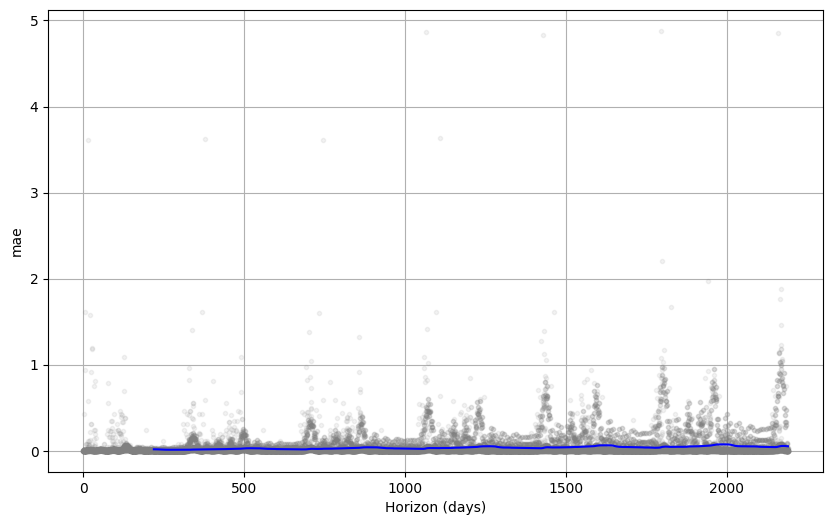

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv_results, metric='mae');
plt.show()

In [ ]:
df_riyadh_temperature = df[df['City'] == 'Riyadh'][['DATE_ONLY', 'AIR_TEMPERATURE']].rename(columns={'DATE_ONLY': 'ds', 'AIR_TEMPERATURE': 'y'})


In [ ]:
df_riyadh_temperature['ds'] = pd.to_datetime(df_riyadh_temperature['ds'])

In [ ]:
df_riyadh_temperature.sort_values(by='ds',inplace=True)

In [ ]:
model_temperature = Prophet()

In [ ]:
model_temperature.fit(df_riyadh_temperature)

17:34:18 - cmdstanpy - INFO - Chain [1] start processing
17:34:19 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_temperature = model_temperature.make_future_dataframe(periods=365, freq='D')


In [ ]:
forecast_temperature = model_temperature.predict(future_temperature)
forecast_temperature[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7649,2025-12-27,15.805146,12.580044,18.916837
7650,2025-12-28,15.716643,12.622401,19.056941
7651,2025-12-29,15.558657,12.442209,18.798543
7652,2025-12-30,15.487192,12.156617,18.348913
7653,2025-12-31,15.529249,12.092040,18.747753


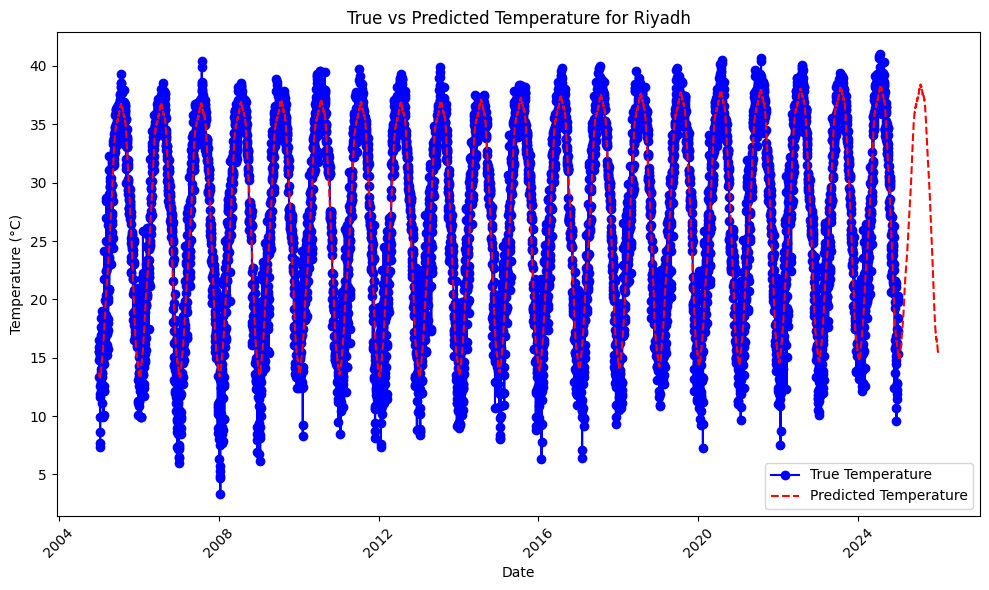

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_riyadh_temperature['ds'], df_riyadh_temperature['y'], label="True Temperature", color='blue', linestyle='-', marker='o')
plt.plot(forecast_temperature['ds'], forecast_temperature['yhat'], label="Predicted Temperature", color='red', linestyle='--')

plt.title("True vs Predicted Temperature for Riyadh")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
cv_temp = cross_validation(model_temperature,initial= '1825 days' ,period='365 days',horizon='2190 days')
cv_temp

  0%|          | 0/10 [00:00<?, ?it/s]

17:34:22 - cmdstanpy - INFO - Chain [1] start processing
17:34:23 - cmdstanpy - INFO - Chain [1] done processing
17:34:24 - cmdstanpy - INFO - Chain [1] start processing
17:34:24 - cmdstanpy - INFO - Chain [1] done processing
17:34:25 - cmdstanpy - INFO - Chain [1] start processing
17:34:26 - cmdstanpy - INFO - Chain [1] done processing
17:34:27 - cmdstanpy - INFO - Chain [1] start processing
17:34:28 - cmdstanpy - INFO - Chain [1] done processing
17:34:29 - cmdstanpy - INFO - Chain [1] start processing
17:34:29 - cmdstanpy - INFO - Chain [1] done processing
17:34:31 - cmdstanpy - INFO - Chain [1] start processing
17:34:31 - cmdstanpy - INFO - Chain [1] done processing
17:34:32 - cmdstanpy - INFO - Chain [1] start processing
17:34:32 - cmdstanpy - INFO - Chain [1] done processing
17:34:33 - cmdstanpy - INFO - Chain [1] start processing
17:34:33 - cmdstanpy - INFO - Chain [1] done processing
17:34:34 - cmdstanpy - INFO - Chain [1] start processing
17:34:34 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-01-05,13.053032,10.225721,16.189509,14.333333,2010-01-04
1,2010-01-06,12.973772,9.683326,15.886644,15.111111,2010-01-04
2,2010-01-07,12.868002,9.854056,15.856127,13.055556,2010-01-04
3,2010-01-08,12.665184,9.536094,15.721662,12.444444,2010-01-04
4,2010-01-09,12.615978,9.324746,15.339128,13.333333,2010-01-04
...,...,...,...,...,...,...
21864,2024-12-27,15.859100,12.436084,19.153605,19.777778,2019-01-02
21865,2024-12-28,15.788130,12.103086,19.291269,20.333333,2019-01-02
21866,2024-12-29,15.718837,12.264596,19.137513,17.333333,2019-01-02
21867,2024-12-30,15.574050,12.349527,18.926540,20.000000,2019-01-02


In [ ]:
metrics = performance_metrics(cv_temp)
metrics.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
1967,2186 days,9.728178,3.119003,2.312172,0.089838,0.054210,0.090599,0.861574
1968,2187 days,9.749641,3.122442,2.316386,0.090549,0.054467,0.091379,0.860979
1969,2188 days,9.773606,3.126277,2.318153,0.091079,0.054601,0.092010,0.860201
1970,2189 days,9.804951,3.131286,2.321156,0.091698,0.054809,0.092743,0.858966
1971,2190 days,9.851070,3.138641,2.326738,0.092575,0.054958,0.093639,0.857594


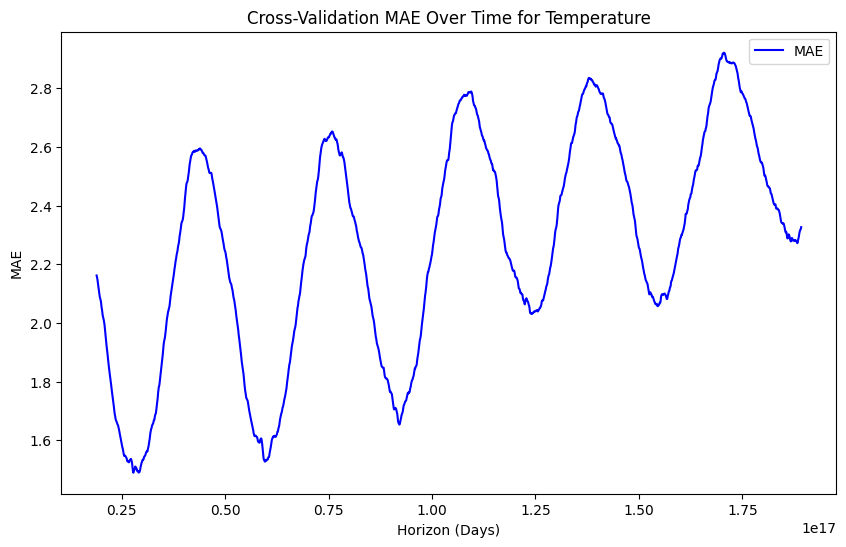

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(metrics['horizon'], metrics['mae'], label='MAE', color='blue')
plt.title("Cross-Validation MAE Over Time for Temperature")
plt.xlabel("Horizon (Days)")
plt.ylabel("MAE")
plt.legend()
plt.show()

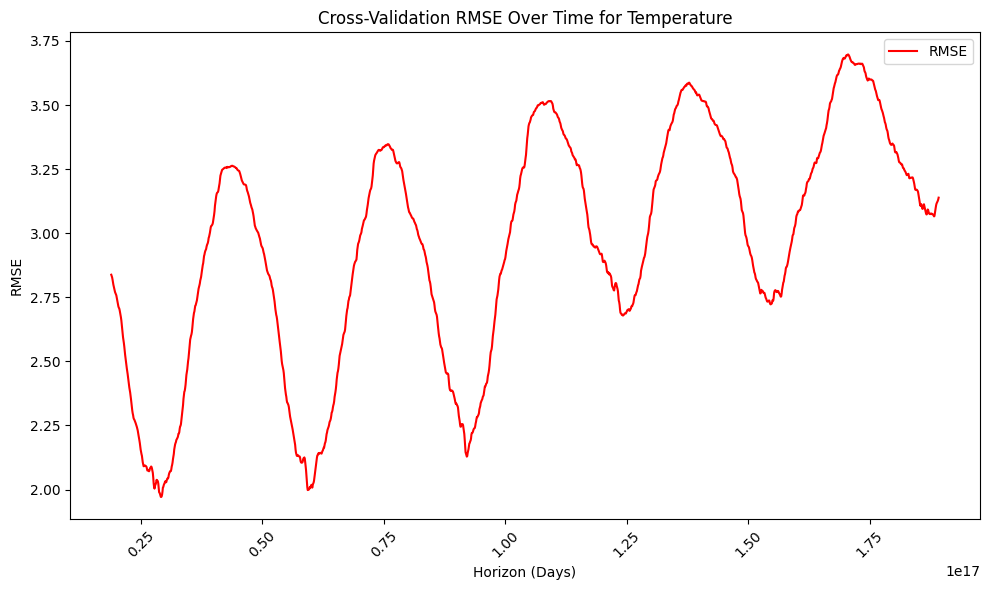

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(metrics['horizon'], metrics['rmse'], label='RMSE', color='red')
plt.title("Cross-Validation RMSE Over Time for Temperature")
plt.xlabel("Horizon (Days)")
plt.ylabel("RMSE")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
### def jeddah

In [ ]:
df_jeddah['ds'] = pd.to_datetime(df_jeddah['ds'])
df_jeddah.head()

,ds,y
0,2022-01-01,0.0
1,2022-01-02,0.0
2,2022-01-03,0.0
3,2022-01-04,0.0
4,2022-01-05,0.0


In [ ]:
df_jeddah.sort_values(by='ds',inplace=True)

In [ ]:
df_filtered = df_jeddah[(df_jeddah['ds'] >= '2009-01-01') & (df_jeddah['ds'] <= '2024-12-31')]
df_filtered.tail()

,ds,y
5086,2024-12-30,0.0
2178,2024-12-30,0.0
5087,2024-12-31,0.0
9459,2024-12-31,0.0
2179,2024-12-31,0.0


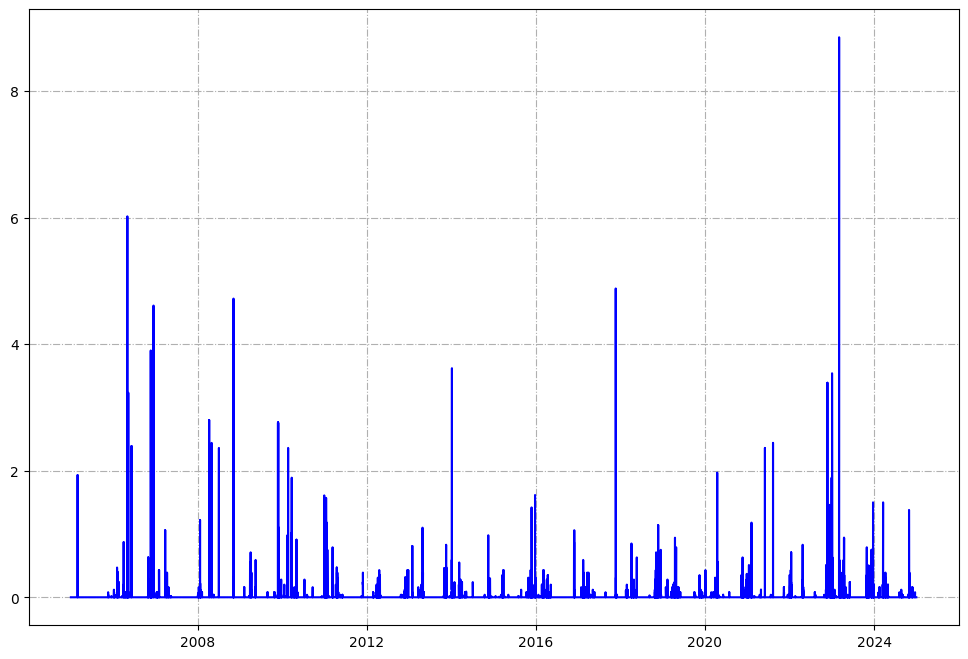

In [ ]:
plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')
plt.plot(df_jeddah['ds'], df_jeddah['y'], 'b')
plt.show()

In [ ]:
train_size = int(0.8 * len(df))  
train_jed = df_jeddah.iloc[:train_size]
test_jed = df_jeddah.iloc[train_size:]

In [ ]:
train_jed.shape, test_jed.shape

((17492, 2), (4374, 2))

In [ ]:
from prophet import Prophet
model_jed = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model_jed.fit(train_jed)

17:34:40 - cmdstanpy - INFO - Chain [1] start processing
17:34:51 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
horizon_j =3190 # 6 years monthly
future_jed = model_jed.make_future_dataframe(periods=horizon_j)
forecast_jed = model_jed.predict(future_jed)
forecast_jed[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9017,2029-09-10,0.009535,-0.783971,0.737092
9018,2029-09-11,0.001002,-0.245529,0.257638
9019,2029-09-12,-0.001632,-0.253127,0.278838
9020,2029-09-13,-0.007031,-0.573886,0.609491
9021,2029-09-14,-0.004184,-0.396643,0.372275


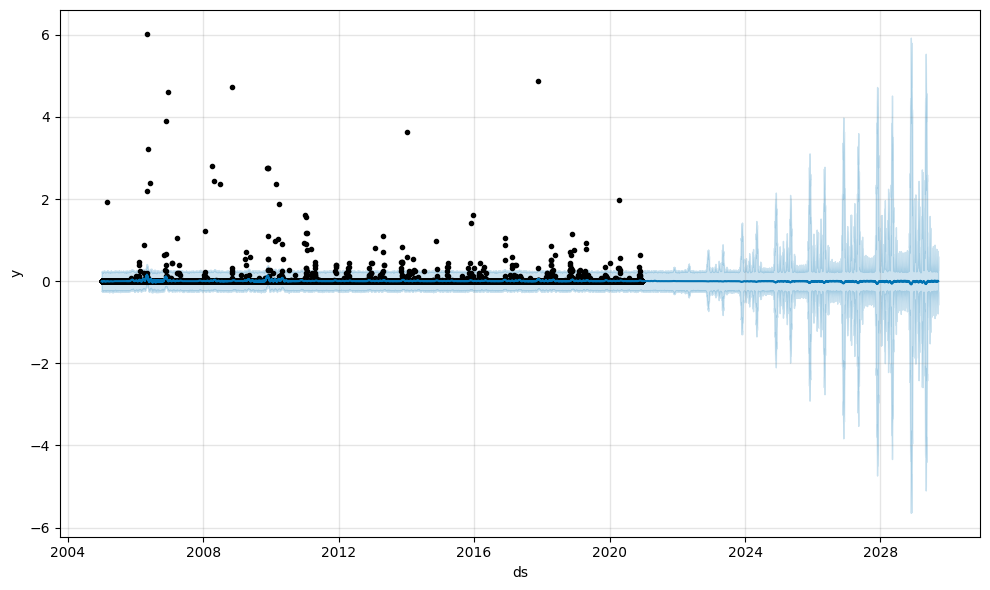

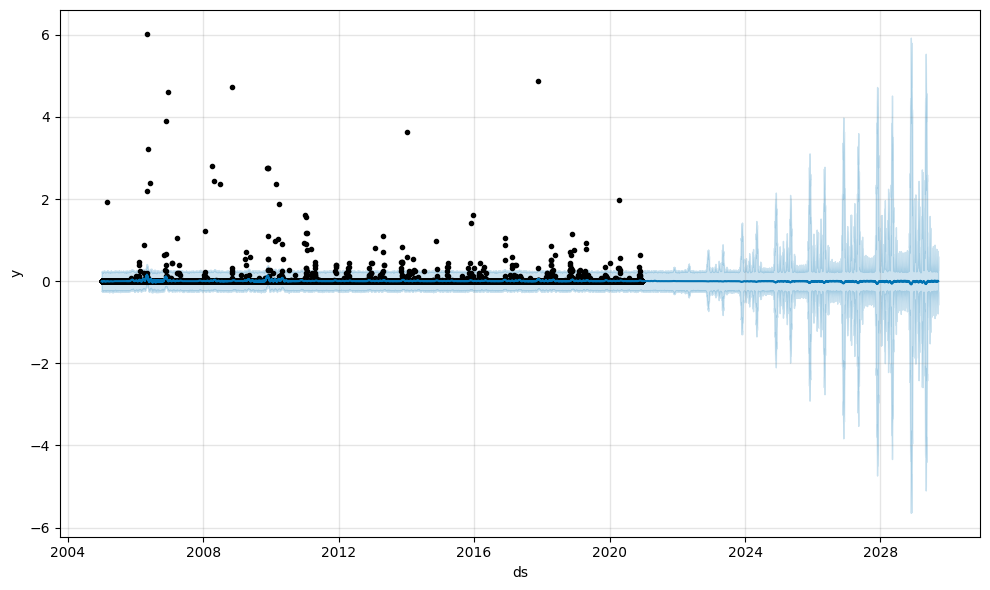

In [ ]:
figr_jed= model_jed.plot(forecast_jed);
figr_jed

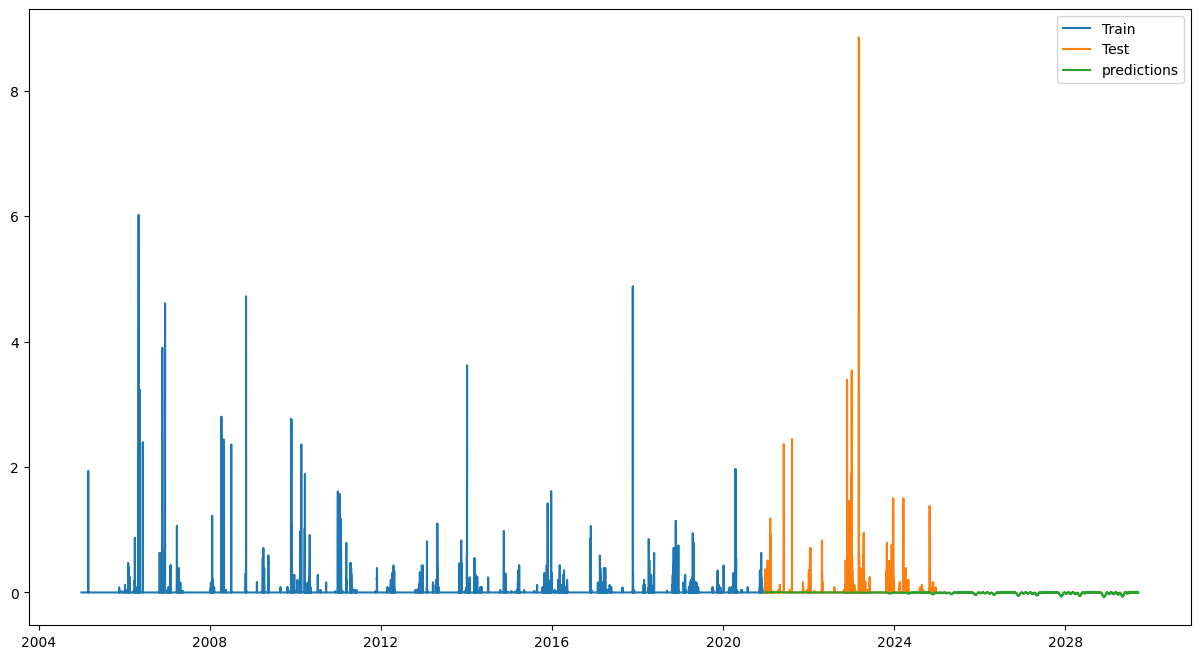

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(train_jed['ds'], train_jed['y'], label="Train")
plt.plot(test_jed['ds'], test_jed['y'], label="Test")
plt.plot(forecast_jed[-horizon_j:]['ds'], forecast_jed[-horizon_j:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

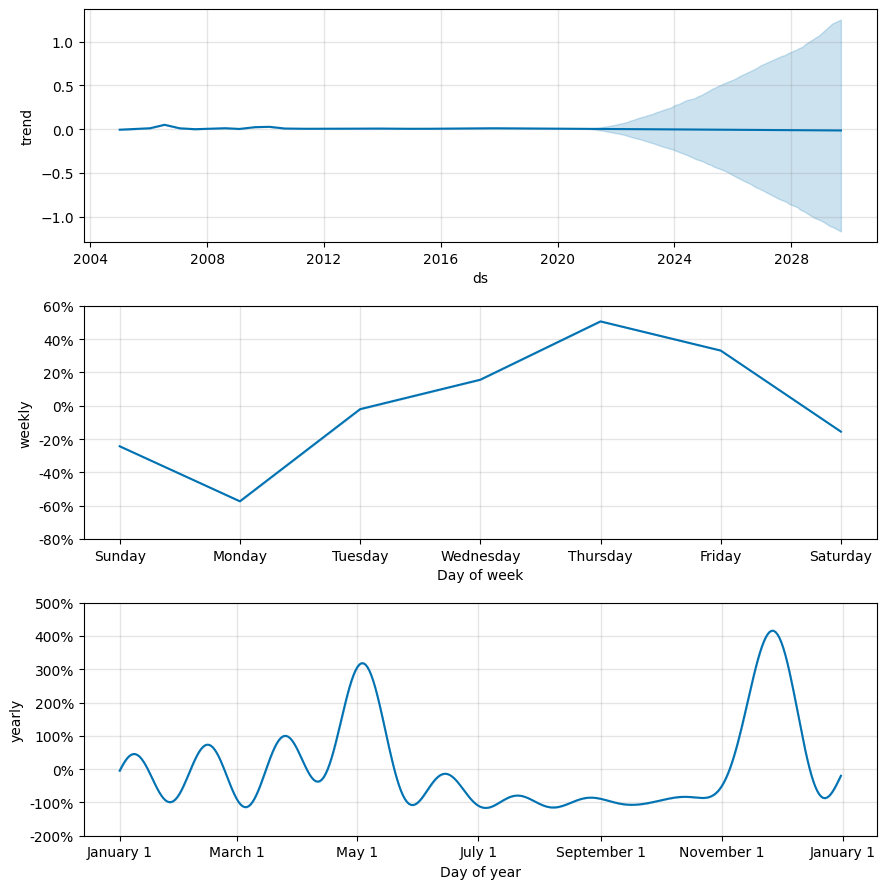

In [ ]:
model_jed.plot_components(forecast_jed);
plt.show()

In [ ]:
df_jeddah_temperature = df[df['City'] == 'Riyadh'][['DATE_ONLY', 'AIR_TEMPERATURE']].rename(columns={'DATE_ONLY': 'ds', 'AIR_TEMPERATURE': 'y'})


In [ ]:
df_jeddah_temperature['ds'] = pd.to_datetime(df_jeddah_temperature['ds'])

In [ ]:
df_jeddah_temperature.sort_values(by='ds',inplace=True)

In [ ]:
model_temperature_jed = Prophet()

In [ ]:
model_temperature_jed.fit(df_jeddah_temperature)

17:34:54 - cmdstanpy - INFO - Chain [1] start processing
17:34:55 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_temperature_jd = model_temperature_jed.make_future_dataframe(periods=36, freq='D')


In [ ]:
forecast_temperature_jed = model_temperature_jed.predict(future_temperature_jd)
forecast_temperature_jed[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7320,2025-02-01,16.661598,13.597634,19.865435
7321,2025-02-02,16.755001,13.536766,19.922316
7322,2025-02-03,16.778895,13.666176,19.909188
7323,2025-02-04,16.888925,13.855152,19.863992
7324,2025-02-05,17.111730,13.736071,20.318709


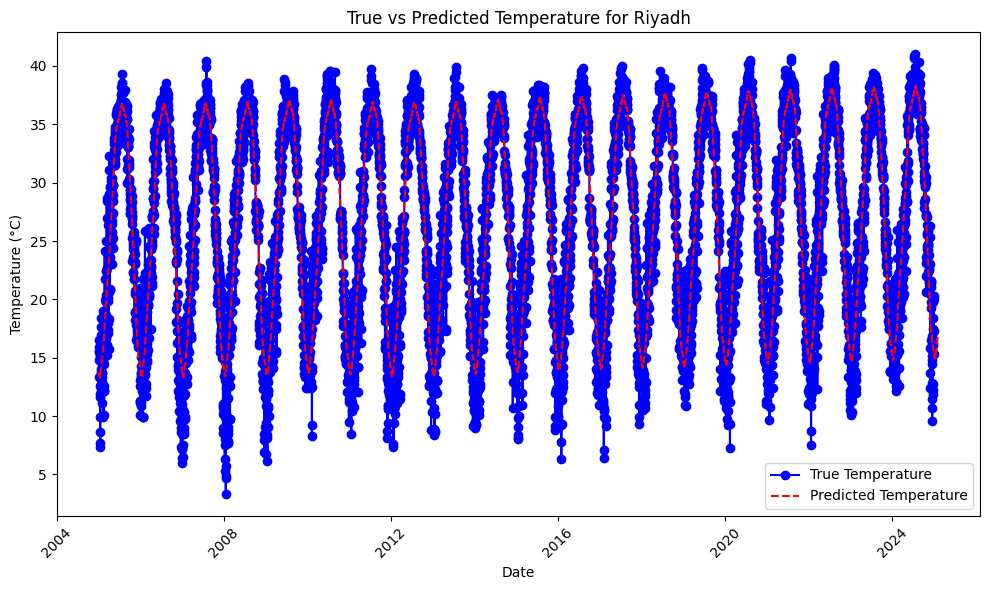

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_jeddah_temperature['ds'], df_jeddah_temperature['y'], label="True Temperature", color='blue', linestyle='-', marker='o')
plt.plot(forecast_temperature_jed['ds'], forecast_temperature_jed['yhat'], label="Predicted Temperature", color='red', linestyle='--')

plt.title("True vs Predicted Temperature for Riyadh")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
cv_temp_jed = cross_validation(model_temperature_jed,initial= '1825 days' ,period='36 days',horizon='2110 days')
cv_temp_jed

  0%|          | 0/94 [00:00<?, ?it/s]

17:34:57 - cmdstanpy - INFO - Chain [1] start processing
17:34:57 - cmdstanpy - INFO - Chain [1] done processing
17:34:58 - cmdstanpy - INFO - Chain [1] start processing
17:34:58 - cmdstanpy - INFO - Chain [1] done processing
17:34:59 - cmdstanpy - INFO - Chain [1] start processing
17:34:59 - cmdstanpy - INFO - Chain [1] done processing
17:34:59 - cmdstanpy - INFO - Chain [1] start processing
17:34:59 - cmdstanpy - INFO - Chain [1] done processing
17:35:00 - cmdstanpy - INFO - Chain [1] start processing
17:35:00 - cmdstanpy - INFO - Chain [1] done processing
17:35:01 - cmdstanpy - INFO - Chain [1] start processing
17:35:01 - cmdstanpy - INFO - Chain [1] done processing
17:35:01 - cmdstanpy - INFO - Chain [1] start processing
17:35:01 - cmdstanpy - INFO - Chain [1] done processing
17:35:02 - cmdstanpy - INFO - Chain [1] start processing
17:35:02 - cmdstanpy - INFO - Chain [1] done processing
17:35:03 - cmdstanpy - INFO - Chain [1] start processing
17:35:03 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-01-22,14.421723,11.136069,17.595988,15.500000,2010-01-21
1,2010-01-23,14.643629,11.533105,17.744276,16.222222,2010-01-21
2,2010-01-24,15.043820,12.130723,18.139700,19.777778,2010-01-21
3,2010-01-25,15.195473,12.210255,18.149988,20.277778,2010-01-21
4,2010-01-26,15.416512,12.231325,18.586603,13.555556,2010-01-21
...,...,...,...,...,...,...
198094,2024-12-27,15.725606,12.345215,19.523228,19.777778,2019-03-23
198095,2024-12-28,15.660624,12.228226,19.097063,20.333333,2019-03-23
198096,2024-12-29,15.595625,12.096058,19.305253,17.333333,2019-03-23
198097,2024-12-30,15.450084,12.116137,19.019352,20.000000,2019-03-23


In [ ]:
metrics_jed = performance_metrics(cv_temp_jed)
metrics_jed.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
1895,2106 days,16.582237,4.072129,3.111103,0.136355,0.092951,0.134881,0.748753
1896,2107 days,16.570764,4.070720,3.110071,0.136303,0.092933,0.134860,0.749118
1897,2108 days,16.573631,4.071072,3.110523,0.136361,0.092940,0.134923,0.749236
1898,2109 days,16.588702,4.072923,3.111475,0.136504,0.092951,0.135034,0.749130
1899,2110 days,16.626250,4.077530,3.114451,0.136771,0.092933,0.135240,0.748759


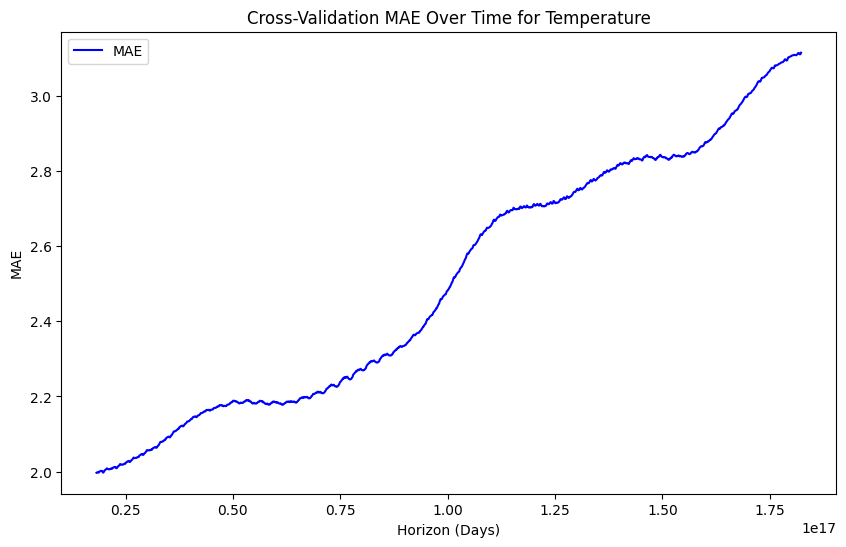

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(metrics_jed['horizon'], metrics_jed['mae'], label='MAE', color='blue')
plt.title("Cross-Validation MAE Over Time for Temperature")
plt.xlabel("Horizon (Days)")
plt.ylabel("MAE")
plt.legend()
plt.show()

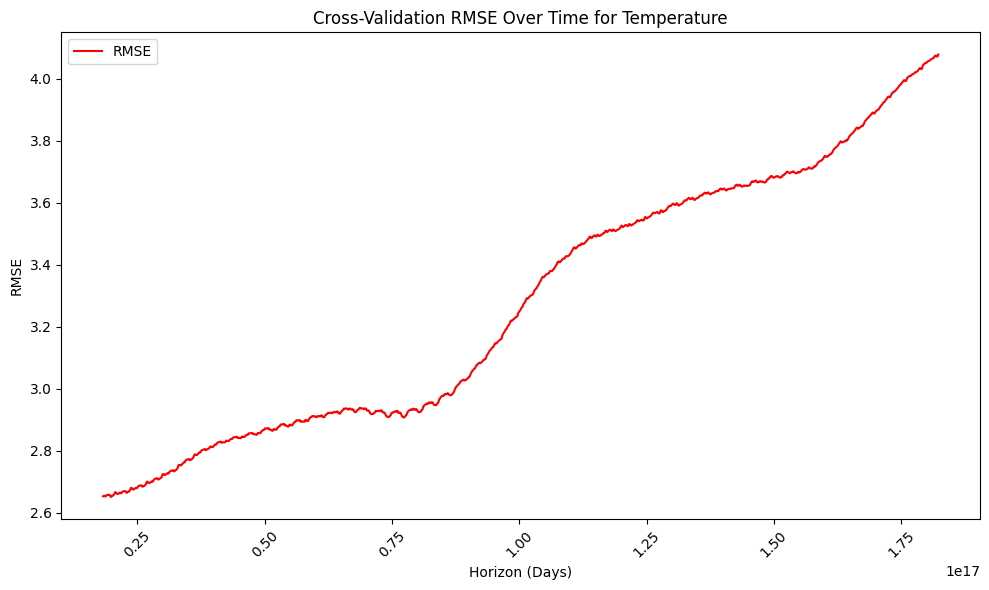

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(metrics_jed['horizon'], metrics_jed['rmse'], label='RMSE', color='red')
plt.title("Cross-Validation RMSE Over Time for Temperature")
plt.xlabel("Horizon (Days)")
plt.ylabel("RMSE")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Croston Models (For Sparse Rainfall)

### Riyadh Modeling

<Axes: xlabel='DATE_ONLY'>

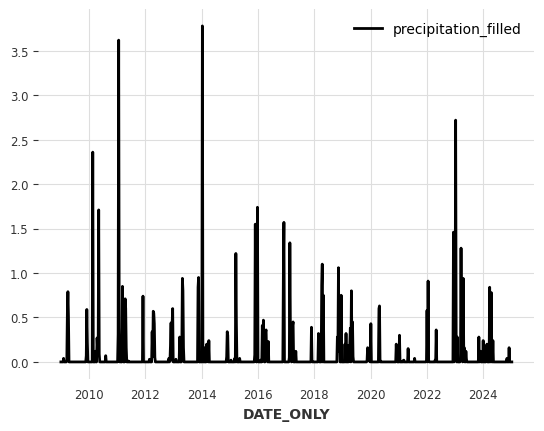

In [114]:
from darts import TimeSeries
series = TimeSeries.from_dataframe(rdy_filtered_week, 'DATE_ONLY', 'precipitation_filled',freq='W')
series.plot()

In [115]:
from darts.utils.missing_values import fill_missing_values
series = fill_missing_values(series)

<Axes: xlabel='DATE_ONLY'>

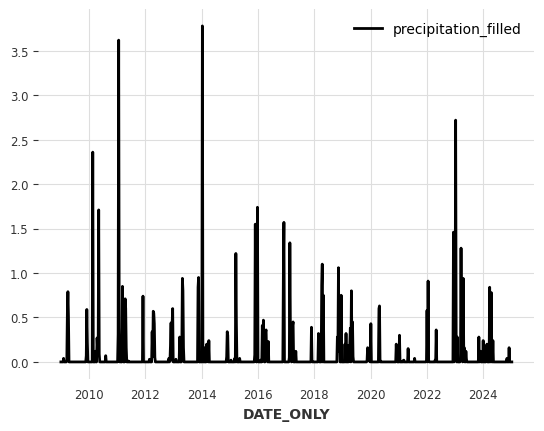

In [116]:
series.plot()

In [117]:
# Applying rolling window calculations
rolling_mean_example = series.window_transform({"function":"mean", "window": 365})

<Axes: xlabel='DATE_ONLY'>

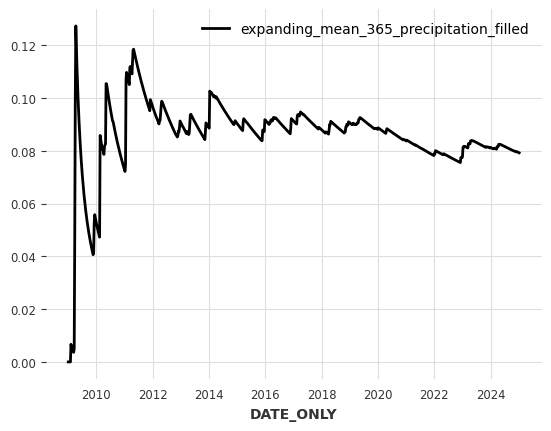

In [118]:
rolling_mean_example.plot()

<Axes: xlabel='DATE_ONLY'>

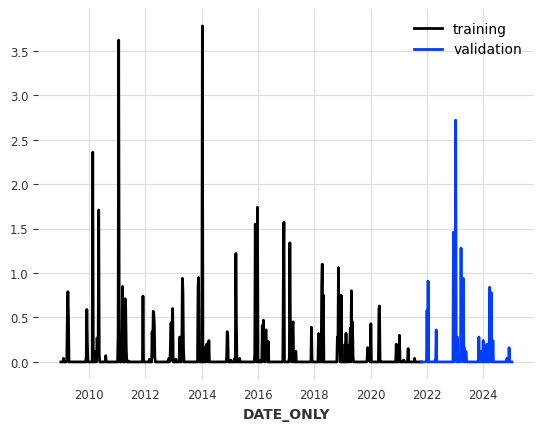

In [119]:
train, val = (series).split_before(0.8)
train.plot(label="training")
val.plot(label="validation")

### 3. Baseline Comparisons
- Naive Seasonal (K=1)
- Exponential Smoothing

<Axes: xlabel='DATE_ONLY'>

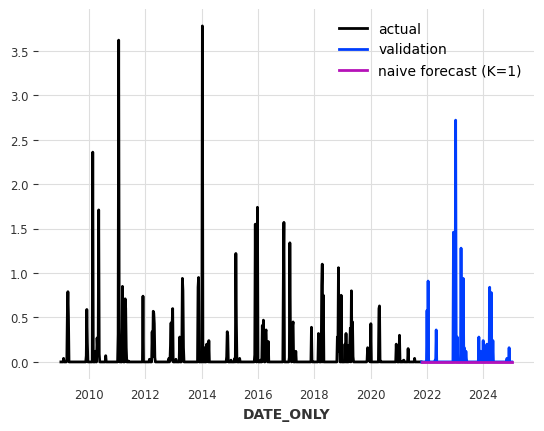

In [120]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(len(val))

train.plot(label="actual")
val.plot(label = "validation")
naive_forecast.plot(label="naive forecast (K=1)")

### 🔍 Evaluation Metrics
- MAE, RMSE from Darts
- Prophet Cross-Validation

In [121]:
from darts.metrics import rmse, mae

rmse_value = rmse(val, naive_forecast)
mae_value = mae(val, naive_forecast)

print(f"Root Mean Squared Error (RMSE): {rmse_value}")
print(f"Mean Absolute Error (MAE): {mae_value}")

Root Mean Squared Error (RMSE): 0.30234401724179155
Mean Absolute Error (MAE): 0.07880952380952382


In [122]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)

exp_forecast = model.predict(len(val))

<Axes: xlabel='DATE_ONLY'>

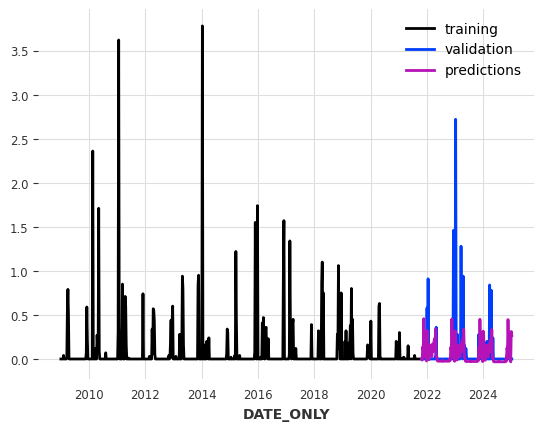

In [123]:
train.plot(label="training")
val.plot(label="validation")
exp_forecast.plot(label = "predictions")

In [124]:
rmse_value = rmse(val, exp_forecast)
mae_value = mae(val, exp_forecast)

print(f"Root Mean Squared Error (RMSE): {rmse_value}")
print(f"Mean Absolute Error (MAE): {mae_value}")

Root Mean Squared Error (RMSE): 0.2912722444069778
Mean Absolute Error (MAE): 0.1280799152362027


In [125]:
from darts.models import Croston

cros_no_covariate_model = Croston(version = 'optimized',alpha_d=0.3015, alpha_p=0.0000)

cros_no_covariate_model.fit(train)
cros_no_covariate_base_preds = cros_no_covariate_model.predict(len(val))

cros_no_covariate_acc_mae = mae(val, cros_no_covariate_base_preds)
cros_no_covariate_acc_rmse = rmse(val, cros_no_covariate_base_preds)

covariates_dict={}

cross_no_covariat_dict = {
        "MAE": cros_no_covariate_acc_mae,
        "RMSE": cros_no_covariate_acc_rmse
    }
covariates_dict[f"cros_no_covariate_opt"] = cross_no_covariat_dict

In [126]:
covariates_dict

{'cros_no_covariate_opt': {'MAE': 0.09718625996649541,
  'RMSE': 0.2959949145814511}}

<Axes: xlabel='DATE_ONLY'>

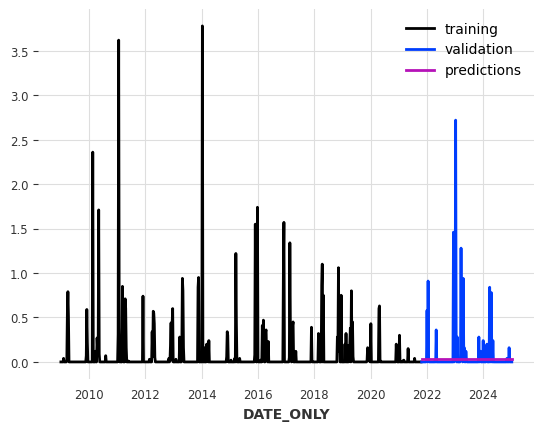

In [127]:
train.plot(label="training")
val.plot(label="validation")
cros_no_covariate_base_preds.plot(label = "predictions")

In [128]:
cros_no_covariate_model = Croston(version = 'sba', alpha_d=0.3081, alpha_p=0.0000)
cros_no_covariate_model.fit(train)
cros_no_covariate_sba_preds = cros_no_covariate_model.predict(len(val))

cros_no_covariate_acc_mae = mae(val, cros_no_covariate_sba_preds)
cros_no_covariate_acc_rmse = rmse(val, cros_no_covariate_sba_preds)


cross_no_covariat_dict = {
        "MAE": cros_no_covariate_acc_mae,
        "RMSE": cros_no_covariate_acc_rmse
    }
covariates_dict[f"cros_no_covariate_sba"] = cross_no_covariat_dict
print(covariates_dict)

{'cros_no_covariate_opt': {'MAE': 0.09718625996649541, 'RMSE': 0.2959949145814511}, 'cros_no_covariate_sba': {'MAE': 0.09623234048631556, 'RMSE': 0.29624473763985426}}


<Axes: xlabel='DATE_ONLY'>

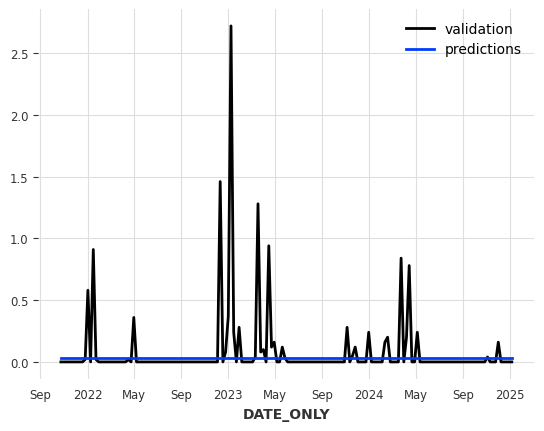

In [129]:
val.plot(label="validation")
cros_no_covariate_sba_preds.plot(label = "predictions")

In [130]:
cros_no_covariate_model = Croston(version = 'tsb', alpha_d= 0.0351, alpha_p=0.4128)
cros_no_covariate_model.fit(train)
cros_no_covariate_tsb_preds = cros_no_covariate_model.predict(len(val))

cros_no_covariate_acc_mae = mae(val, cros_no_covariate_tsb_preds)
cros_no_covariate_acc_rmse = rmse(val, cros_no_covariate_tsb_preds)

cross_no_covariat_dict = {
        "MAE": cros_no_covariate_acc_mae,
        "RMSE": cros_no_covariate_acc_rmse
    }
covariates_dict[f"cros_no_covariate_tsb"] = cross_no_covariat_dict

In [49]:
covariates_dict

{'cros_no_covariate_opt': {'MAE': 0.09718625996649541,
  'RMSE': 0.2959949145814511},
 'cros_no_covariate_sba': {'MAE': 0.09623234048631556,
  'RMSE': 0.29624473763985426},
 'cros_no_covariate_tsb': {'MAE': 0.07893223710283828,
  'RMSE': 0.30229139630393986}}

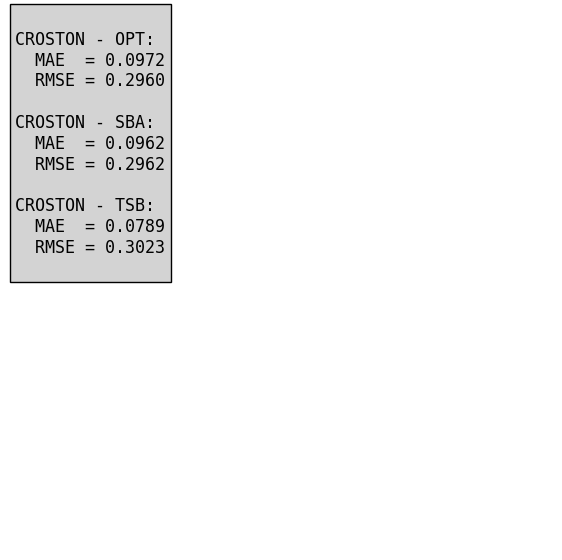

In [136]:
import matplotlib.pyplot as plt

# البيانات
results = {
    'opt': {'MAE': 0.0972, 'RMSE': 0.2960},
    'sba': {'MAE': 0.0962, 'RMSE': 0.2962},
    'tsb': {'MAE': 0.0789, 'RMSE': 0.3023}
}

# إعداد النص
text = f"""
CROSTON - OPT:
  MAE  = {results['opt']['MAE']:.4f}
  RMSE = {results['opt']['RMSE']:.4f}

CROSTON - SBA:
  MAE  = {results['sba']['MAE']:.4f}
  RMSE = {results['sba']['RMSE']:.4f}

CROSTON - TSB:
  MAE  = {results['tsb']['MAE']:.4f}
  RMSE = {results['tsb']['RMSE']:.4f}
"""

# عرض النص داخل بوكس
plt.figure(figsize=(7, 4))
plt.axis('off')
plt.text(0.01, 0.9, text, fontsize=12, fontfamily='monospace',
         bbox=dict(facecolor='lightgrey', edgecolor='black'))
plt.show()



<Axes: xlabel='DATE_ONLY'>

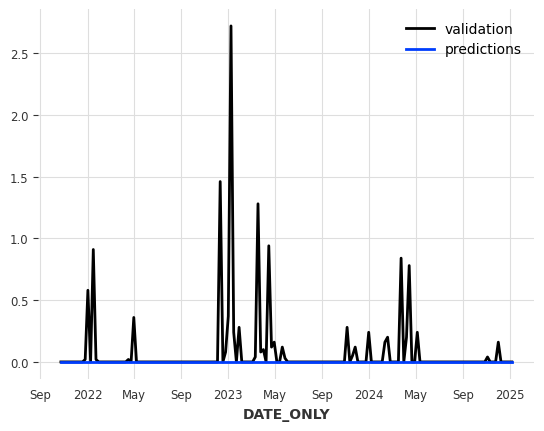

In [50]:
val.plot(label="validation")
cros_no_covariate_tsb_preds.plot(label = "predictions")

# Two-Stage (Hybrid) Model: Zero-Inflated Approach
Split the problem into two sub-problems:

1. Rain occurrence (classification): Will it rain on a given day? (yes/no)

2. Rain amount (regression): If it rains, how much?

<br>

* Stage 1: Rain/No-Rain Classifier

  * Use a binary classification model to predict rain occurrence:

    * Logistic Regression

    * Random Forest / XGBoost

    * LSTM / GRU (with binary output)

* Stage 2: Rainfall Amount Regressor
  * Use only the rainy days (> 0 mm) to predict the rainfall amount:

    * Gradient Boosting (e.g. XGBoostRegressor)

    * Gaussian Process Regressor (if computationally feasible)

    * Quantile Regression (for uncertainty)

    * You can then combine the two to get expected rainfall.

Stage 1 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       656
           1       0.78      0.28      0.41        64

    accuracy                           0.93       720
   macro avg       0.86      0.64      0.69       720
weighted avg       0.92      0.93      0.91       720


Combined Model RMSE: 0.116 mm


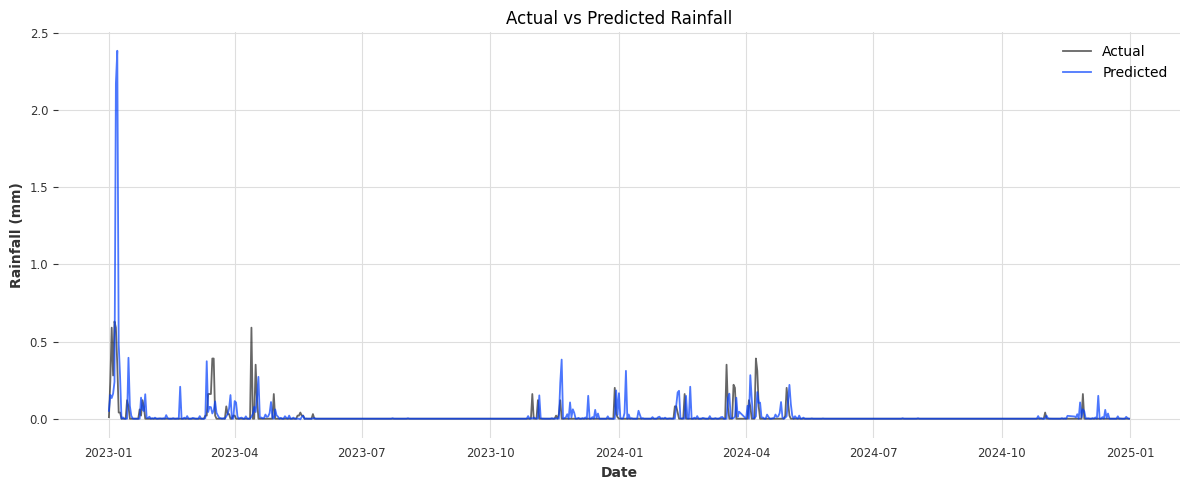

In [55]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# --- 1. Load and preprocess data ---
df = rdy_filtered.reset_index().copy()[['precipitation_filled','DATE_ONLY']]
df.columns=['rainfall','date']

# --- 2. Feature Engineering ---
df['dayofyear'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['lag1'] = df['rainfall'].shift(1)
df['lag2'] = df['rainfall'].shift(2)
df['lag3'] = df['rainfall'].shift(3)
df = df.dropna()

# Target Variables
df['rain_flag'] = (df['rainfall'] > 0).astype(int)  # Stage 1
df['rainfall_pos'] = df['rainfall']  # Stage 2 (only when rain > 0)

# Features
features = ['dayofyear', 'month', 'lag1', 'lag2', 'lag3']

# --- 3. Train-test split ---
train = df[df['year'] < 2023]
test = df[df['year'] >= 2023]

X_train = train[features]
y_train_cls = train['rain_flag']
y_train_reg = train[train['rain_flag'] == 1]['rainfall_pos']
X_train_reg = train[train['rain_flag'] == 1][features]

X_test = test[features]
y_test_cls = test['rain_flag']
y_test_reg = test[test['rain_flag'] == 1]['rainfall_pos']
X_test_reg = test[test['rain_flag'] == 1][features]

X_new = df[features]
y_new_cls = df['rain_flag']
y_new_reg = df[df['rain_flag'] == 1]['rainfall_pos']

# --- 4. Stage 1: Rain/No-Rain Classifier ---
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train_cls)
prob_rain = clf.predict_proba(X_test)[:, 1]
pred_cls = clf.predict(X_test)

print("Stage 1 Classification Report:")
print(classification_report(y_test_cls, pred_cls))

# --- 5. Stage 2: Rainfall Amount Regressor ---
reg = XGBRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)
pred_reg = reg.predict(X_test)

# --- 6. Combine both stages ---
# Expected rainfall = P(rain) × predicted amount if it rains
predicted_rainfall = prob_rain * reg.predict(X_test)

# --- 7. Evaluation ---
actual_rainfall = test['rainfall']
rmse = np.sqrt(mean_squared_error(actual_rainfall, predicted_rainfall))
print(f"\nCombined Model RMSE: {rmse:.3f} mm")

# --- 8. Visualization ---
plt.figure(figsize=(12, 5))
plt.plot(test['date'].values, actual_rainfall.values, label='Actual', alpha=0.6)
plt.plot(test['date'].values, predicted_rainfall, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
# --- 9. Generate future dates ---
future_dates = pd.date_range(start='2025-01-01', end='2030-12-31', freq='D')
future_df = pd.DataFrame({'date': future_dates})
future_df['dayofyear'] = future_df['date'].dt.dayofyear
future_df['month'] = future_df['date'].dt.month

# --- 10. Initialize lag values with last known rainfall values ---
# Get last 3 actual rainfall values from historical dataset
last_known = df.iloc[-3:]['rainfall'].values.tolist()

predictions = []

for i in range(len(future_df)):
    # Create one row of input features
    row = future_df.iloc[i]
    input_features = {
        'dayofyear': row['dayofyear'],
        'month': row['month'],
        'lag1': last_known[-1],
        'lag2': last_known[-2],
        'lag3': last_known[-3],
    }
    X_input = pd.DataFrame([input_features])

    # Stage 1: Predict rain probability
    prob = clf.predict_proba(X_input)[:, 1][0]

    # Stage 2: Predict rain amount (if it rains)
    predicted_amt = reg.predict(X_input)[0]

    # Final forecast = expected value
    expected_rainfall = prob * predicted_amt

    # Store prediction
    predictions.append(expected_rainfall)

    # Update lag values
    last_known.append(expected_rainfall)
    last_known = last_known[-3:]  # keep only last 3

# --- 11. Store and export results ---
future_df['predicted_rainfall'] = predictions

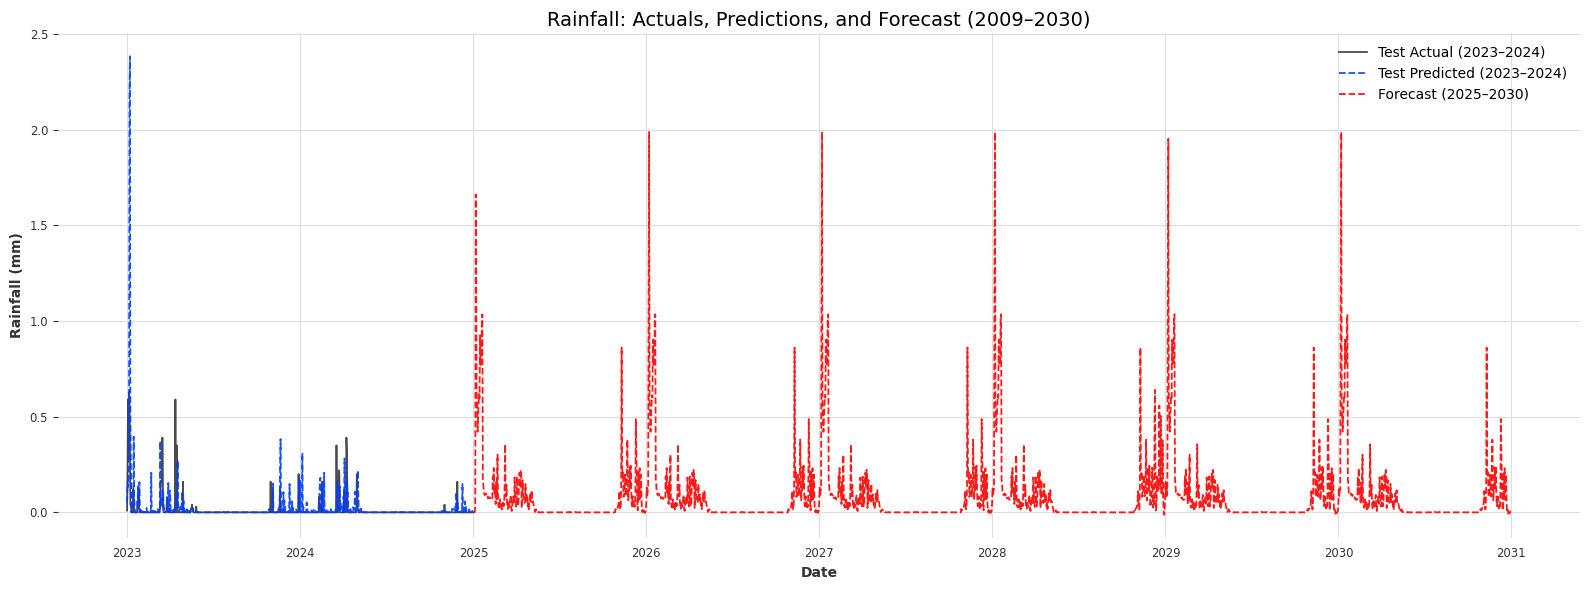

In [57]:
# --- 12. Combine all data for plotting ---

# Add a 'type' column to distinguish phases
train_plot = train[['date', 'rainfall']].copy()
train_plot['type'] = 'train'

test_plot = test[['date', 'rainfall']].copy()
test_plot['type'] = 'test'
test_plot['predicted'] = predicted_rainfall

future_plot = future_df[['date', 'predicted_rainfall']].copy()
future_plot.columns = ['date', 'rainfall']
future_plot['type'] = 'forecast'

# Combine all
plot_df = pd.concat([
    train_plot[['date', 'rainfall', 'type']],
    test_plot[['date', 'rainfall', 'type']],
    future_plot
])

# --- 13. Plot ---
plt.figure(figsize=(16, 6))

# Plot test actuals
plt.plot(plot_df[plot_df['type'] == 'test']['date'],
         plot_df[plot_df['type'] == 'test']['rainfall'],
         label='Test Actual (2023–2024)', alpha=0.7)

# Plot test predictions
plt.plot(test_plot['date'], test_plot['predicted'],
         label='Test Predicted (2023–2024)', alpha=0.9, linestyle='--')

# Plot future forecast
plt.plot(future_plot['date'], future_plot['rainfall'],
         label='Forecast (2025–2030)', color='red', linestyle='--', alpha=0.9)

# Aesthetics
plt.title("Rainfall: Actuals, Predictions, and Forecast (2009–2030)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
import joblib

# Save classifier
joblib.dump(clf, 'Riyadh_rain_classifier_model.joblib')

# Save regressor
joblib.dump(reg, 'Riyadh_rain_regressor_model.joblib')

['Riyadh_rain_regressor_model.joblib']

### Jeddah Modeling

<Axes: xlabel='DATE_ONLY'>

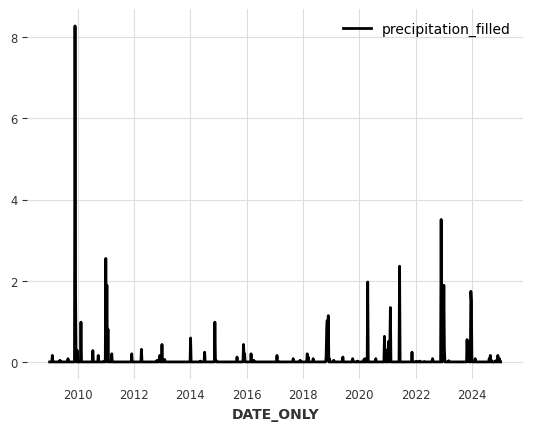

In [59]:
series_jed = TimeSeries.from_dataframe(jed_filtered_week, 'DATE_ONLY', 'precipitation_filled',freq='W')
series_jed.plot()

In [60]:
from darts.utils.missing_values import fill_missing_values
series_jed = fill_missing_values(series_jed)

<Axes: xlabel='DATE_ONLY'>

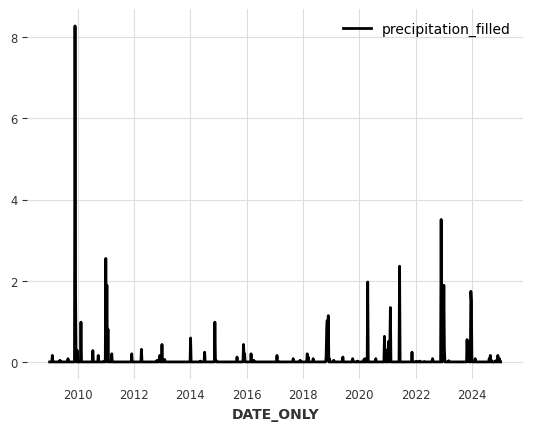

In [61]:
series_jed.plot()

In [62]:
rolling_mean_example_jed = series_jed.window_transform({"function":"mean", "window": 365})

<Axes: xlabel='DATE_ONLY'>

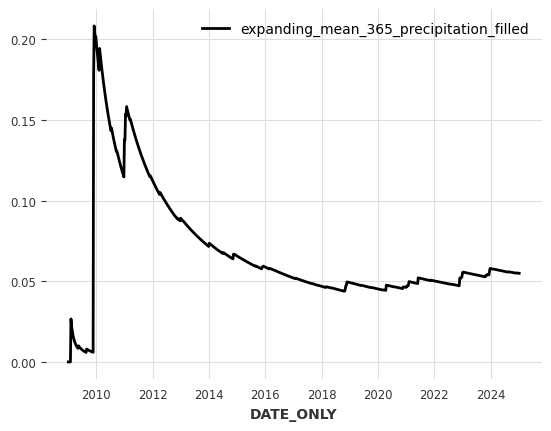

In [63]:
rolling_mean_example_jed.plot()

<Axes: xlabel='DATE_ONLY'>

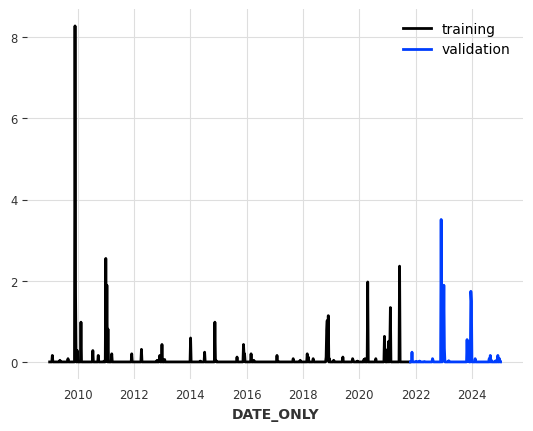

In [64]:
trainـjed, val_jed = (series_jed).split_before(0.8)
trainـjed.plot(label="training")
val_jed.plot(label="validation")

<Axes: xlabel='DATE_ONLY'>

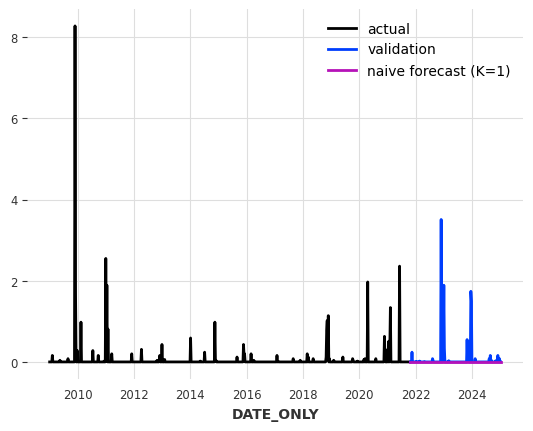

In [65]:
naive_model = NaiveSeasonal(K=1)
naive_model.fit(trainـjed)
naive_forecast = naive_model.predict(len(val_jed))

trainـjed.plot(label="actual")
val_jed.plot(label = "validation")
naive_forecast.plot(label="naive forecast (K=1)")

In [67]:
from darts.metrics import rmse, mae

rmse_value_jed = rmse(val_jed, naive_forecast)
mae_value_jed = mae(val_jed, naive_forecast)

print(f"Root Mean Squared Error (RMSE): {rmse_value_jed}")
print(f"Mean Absolute Error (MAE): {mae_value_jed}")

Root Mean Squared Error (RMSE): 0.3648222006611414
Mean Absolute Error (MAE): 0.07202380952380952


In [68]:
model = ExponentialSmoothing()
model.fit(trainـjed)

exp_forecast = model.predict(len(val_jed))

<Axes: xlabel='DATE_ONLY'>

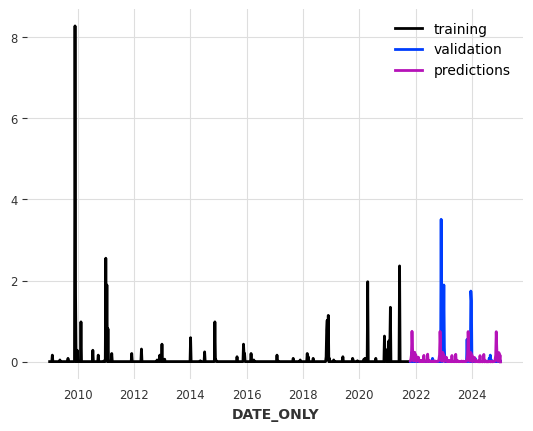

In [69]:
trainـjed.plot(label="training")
val_jed.plot(label="validation")
exp_forecast.plot(label = "predictions")

In [70]:
rmse_value_jed = rmse(val_jed, exp_forecast)
mae_value_jed = mae(val_jed, exp_forecast)

print(f"Root Mean Squared Error (RMSE): {rmse_value_jed}")
print(f"Mean Absolute Error (MAE): {mae_value_jed}")

Root Mean Squared Error (RMSE): 0.36557812709225523
Mean Absolute Error (MAE): 0.10853977659766148


In [71]:
cros_no_covariate_model = Croston(version = 'optimized',alpha_d=0.0087, alpha_p=0.4469)

cros_no_covariate_model.fit(trainـjed)
cros_no_covariate_base_preds = cros_no_covariate_model.predict(len(val_jed))

cros_no_covariate_acc_mae = mae(val_jed, cros_no_covariate_base_preds)
cros_no_covariate_acc_rmse = rmse(val_jed, cros_no_covariate_base_preds)

covariates_dict={}

cross_no_covariat_dict = {
        "MAE": cros_no_covariate_acc_mae,
        "RMSE": cros_no_covariate_acc_rmse
    }
covariates_dict[f"cros_no_covariate_opt"] = cross_no_covariat_dict

In [72]:
covariates_dict

{'cros_no_covariate_opt': {'MAE': 0.13814659608896898,
  'RMSE': 0.35789784494449695}}

<Axes: xlabel='DATE_ONLY'>

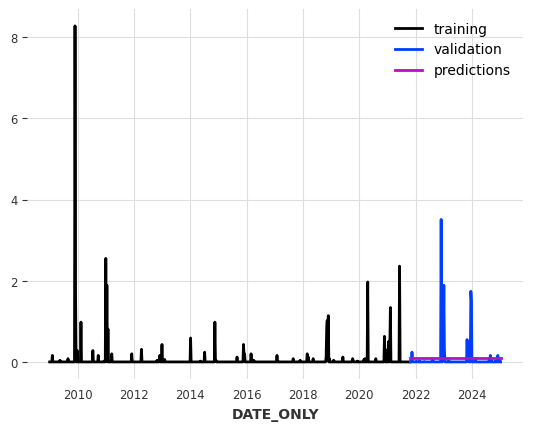

In [73]:
trainـjed.plot(label="training")
val_jed.plot(label="validation")
cros_no_covariate_base_preds.plot(label = "predictions")

In [74]:
cros_no_covariate_model = Croston(version = 'sba',alpha_d= 0.2107, alpha_p=0.0000)

cros_no_covariate_model.fit(trainـjed)
cros_no_covariate_sba_preds = cros_no_covariate_model.predict(len(val_jed))

cros_no_covariate_acc_mae = mae(val_jed, cros_no_covariate_sba_preds)
cros_no_covariate_acc_rmse = rmse(val_jed, cros_no_covariate_sba_preds)


cross_no_covariat_dict = {
        "MAE": cros_no_covariate_acc_mae,
        "RMSE": cros_no_covariate_acc_rmse
    }
covariates_dict[f"cros_no_covariate_sba"] = cross_no_covariat_dict

<Axes: xlabel='DATE_ONLY'>

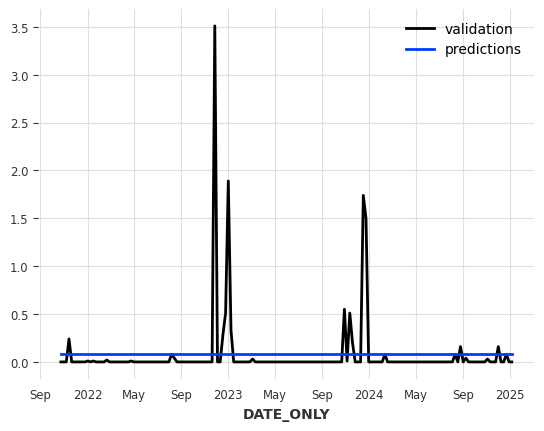

In [75]:
val_jed.plot(label="validation")
cros_no_covariate_sba_preds.plot(label = "predictions")

In [76]:
cros_no_covariate_model = Croston(version = 'tsb', alpha_d= 0.2244, alpha_p= 0.0000)
cros_no_covariate_model.fit(trainـjed)
cros_no_covariate_tsb_preds = cros_no_covariate_model.predict(len(val_jed))

cros_no_covariate_acc_mae = mae(val_jed, cros_no_covariate_tsb_preds)
cros_no_covariate_acc_rmse = rmse(val_jed, cros_no_covariate_tsb_preds)

cross_no_covariat_dict = {
        "MAE": cros_no_covariate_acc_mae,
        "RMSE": cros_no_covariate_acc_rmse
    }
covariates_dict[f"cros_no_covariate_tsb"] = cross_no_covariat_dict

In [77]:
covariates_dict

{'cros_no_covariate_opt': {'MAE': 0.13814659608896898,
  'RMSE': 0.35789784494449695},
 'cros_no_covariate_sba': {'MAE': 0.13452872912763716,
  'RMSE': 0.357761602693834},
 'cros_no_covariate_tsb': {'MAE': 0.07202380952380952,
  'RMSE': 0.3648222006611414}}

<Axes: xlabel='DATE_ONLY'>

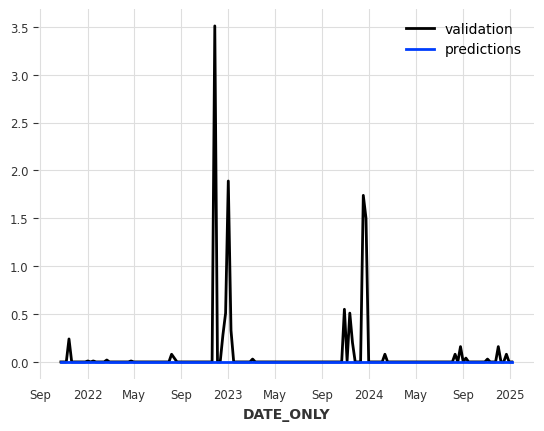

In [78]:
val_jed.plot(label="validation")
cros_no_covariate_tsb_preds.plot(label = "predictions")

## Two-Stage-JEDDAH (Hybrid) Model: Zero-Inflated Approach

Stage 1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       696
           1       0.50      0.04      0.08        24

    accuracy                           0.97       720
   macro avg       0.73      0.52      0.53       720
weighted avg       0.95      0.97      0.95       720


Combined Model RMSE: 0.079 mm


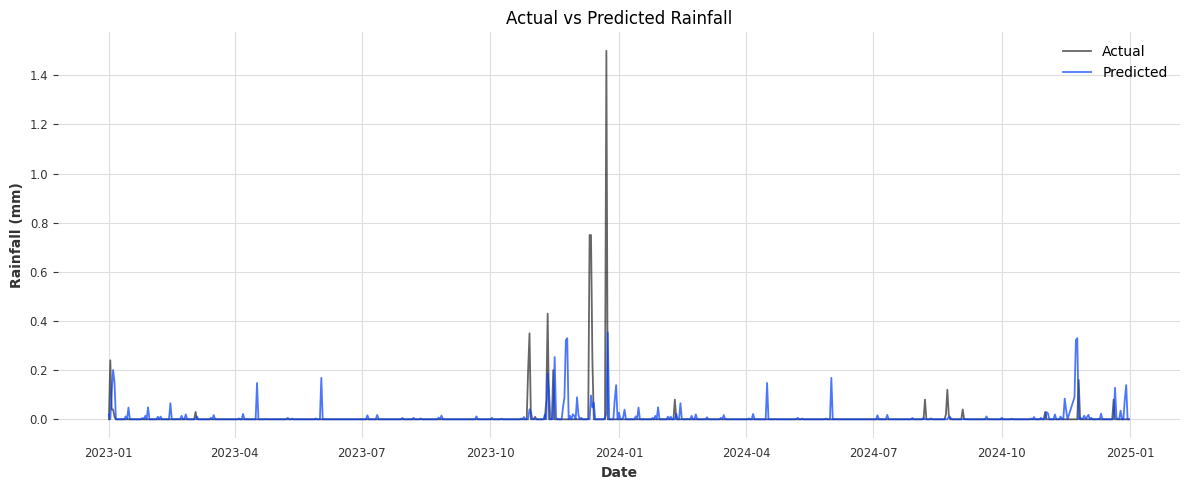

In [79]:
df = jed_filtered.reset_index().copy()[['precipitation_filled','DATE_ONLY']]
df.columns=['rainfall','date']

df['dayofyear'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['lag1'] = df['rainfall'].shift(1)
df['lag2'] = df['rainfall'].shift(2)
df['lag3'] = df['rainfall'].shift(3)
df = df.dropna()

# Target Variables
df['rain_flag'] = (df['rainfall'] > 0).astype(int)  # Stage 1
df['rainfall_pos'] = df['rainfall']  # Stage 2 (only when rain > 0)

# Features
features = ['dayofyear', 'month', 'lag1', 'lag2', 'lag3']

# --- 3. Train-test split ---
train = df[df['year'] < 2023]
test = df[df['year'] >= 2023]

X_train = train[features]
y_train_cls = train['rain_flag']
y_train_reg = train[train['rain_flag'] == 1]['rainfall_pos']
X_train_reg = train[train['rain_flag'] == 1][features]

X_test = test[features]
y_test_cls = test['rain_flag']
y_test_reg = test[test['rain_flag'] == 1]['rainfall_pos']
X_test_reg = test[test['rain_flag'] == 1][features]

X_new = df[features]
y_new_cls = df['rain_flag']
y_new_reg = df[df['rain_flag'] == 1]['rainfall_pos']

# --- 4. Stage 1: Rain/No-Rain Classifier ---
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train_cls)
prob_rain = clf.predict_proba(X_test)[:, 1]
pred_cls = clf.predict(X_test)

print("Stage 1 Classification Report:")
print(classification_report(y_test_cls, pred_cls))

# --- 5. Stage 2: Rainfall Amount Regressor ---
reg = XGBRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)
pred_reg = reg.predict(X_test)

# --- 6. Combine both stages ---
# Expected rainfall = P(rain) × predicted amount if it rains
predicted_rainfall = prob_rain * reg.predict(X_test)

# --- 7. Evaluation ---
actual_rainfall = test['rainfall']
rmse = np.sqrt(mean_squared_error(actual_rainfall, predicted_rainfall))
print(f"\nCombined Model RMSE: {rmse:.3f} mm")

# --- 8. Visualization ---
plt.figure(figsize=(12, 5))
plt.plot(test['date'].values, actual_rainfall.values, label='Actual', alpha=0.6)
plt.plot(test['date'].values, predicted_rainfall, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.tight_layout()
plt.show()

In [80]:
# --- 9. Generate future dates ---
future_dates = pd.date_range(start='2025-01-01', end='2030-12-31', freq='D')
future_df = pd.DataFrame({'date': future_dates})
future_df['dayofyear'] = future_df['date'].dt.dayofyear
future_df['month'] = future_df['date'].dt.month

# --- 10. Initialize lag values with last known rainfall values ---
# Get last 3 actual rainfall values from historical dataset
last_known = df.iloc[-3:]['rainfall'].values.tolist()

predictions = []

for i in range(len(future_df)):
    # Create one row of input features
    row = future_df.iloc[i]
    input_features = {
        'dayofyear': row['dayofyear'],
        'month': row['month'],
        'lag1': last_known[-1],
        'lag2': last_known[-2],
        'lag3': last_known[-3],
    }
    X_input = pd.DataFrame([input_features])

    # Stage 1: Predict rain probability
    prob = clf.predict_proba(X_input)[:, 1][0]

    # Stage 2: Predict rain amount (if it rains)
    predicted_amt = reg.predict(X_input)[0]

    # Final forecast = expected value
    expected_rainfall = prob * predicted_amt

    # Store prediction
    predictions.append(expected_rainfall)

    # Update lag values
    last_known.append(expected_rainfall)
    last_known = last_known[-3:]  # keep only last 3

# --- 11. Store and export results ---
future_df['predicted_rainfall'] = predictions

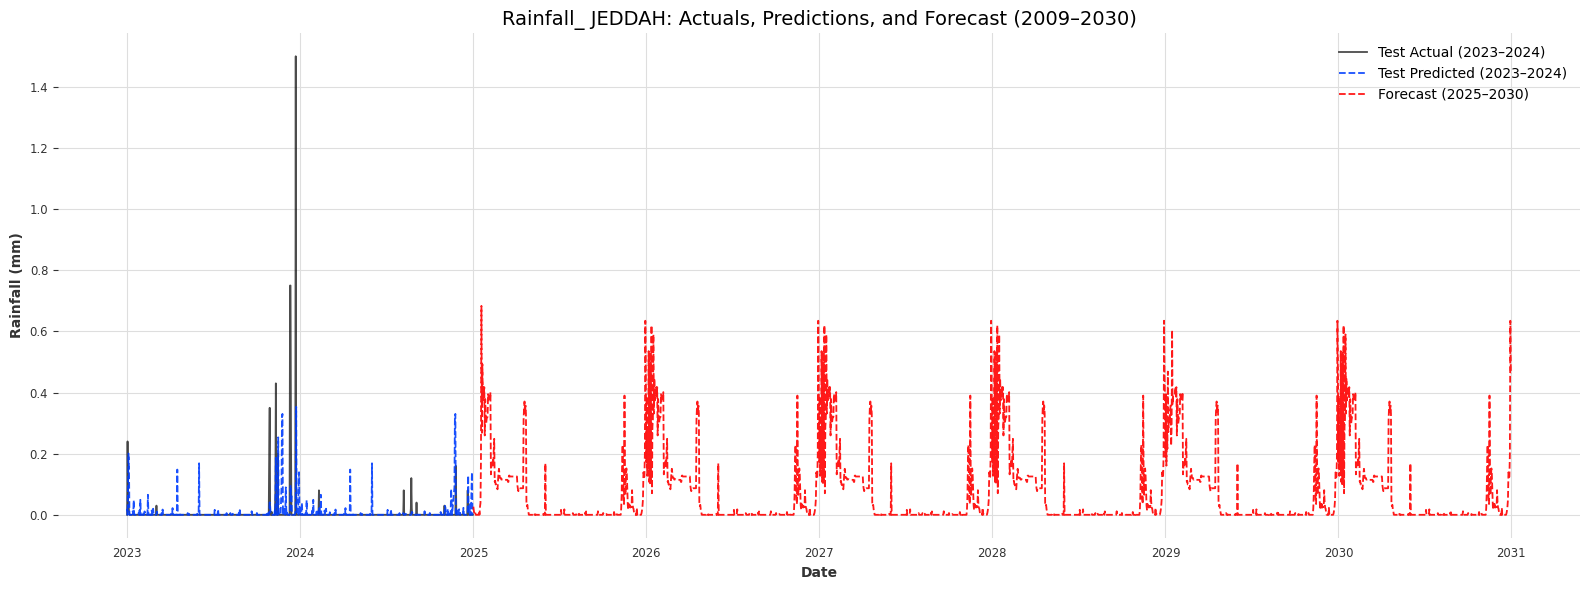

In [81]:
# --- 12. Combine all data for plotting ---

# Add a 'type' column to distinguish phases
train_plot = train[['date', 'rainfall']].copy()
train_plot['type'] = 'train'

test_plot = test[['date', 'rainfall']].copy()
test_plot['type'] = 'test'
test_plot['predicted'] = predicted_rainfall

future_plot = future_df[['date', 'predicted_rainfall']].copy()
future_plot.columns = ['date', 'rainfall']
future_plot['type'] = 'forecast'

# Combine all
plot_df = pd.concat([
    train_plot[['date', 'rainfall', 'type']],
    test_plot[['date', 'rainfall', 'type']],
    future_plot
])

# --- 13. Plot ---
plt.figure(figsize=(16, 6))

# Plot test actuals
plt.plot(plot_df[plot_df['type'] == 'test']['date'],
         plot_df[plot_df['type'] == 'test']['rainfall'],
         label='Test Actual (2023–2024)', alpha=0.7)

# Plot test predictions
plt.plot(test_plot['date'], test_plot['predicted'],
         label='Test Predicted (2023–2024)', alpha=0.9, linestyle='--')

# Plot future forecast
plt.plot(future_plot['date'], future_plot['rainfall'],
         label='Forecast (2025–2030)', color='red', linestyle='--', alpha=0.9)

# Aesthetics
plt.title("Rainfall_ JEDDAH: Actuals, Predictions, and Forecast (2009–2030)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [82]:
import joblib

# Save classifier
joblib.dump(clf, 'Jeddah_rain_classifier_model.joblib')

# Save regressor
joblib.dump(reg, 'Jeddah_rain_regressor_model.joblib')

['Jeddah_rain_regressor_model.joblib']

# Step 5: Compare Forecasts - AIR_TEMPERATURE- with & without SGI 

### - Riyadh

In [ ]:
df_riyadh = df_riyadh.groupby("DATE_ONLY").mean().reset_index()

In [ ]:
ts_riyadh = TimeSeries.from_dataframe(
    df_riyadh,
    time_col="DATE_ONLY",
    value_cols="AIR_TEMPERATURE",
    fill_missing_dates=True,
    freq="D"
)


In [ ]:
ts_riyadh = fill_missing_values(ts_riyadh, method="linear")

ts_train_riyadh = ts_riyadh.slice(pd.Timestamp("2005-01-01"), pd.Timestamp("2024-12-31"))

In [ ]:
model = Prophet()


In [ ]:
# train Prophet
model_riyadh = Prophet()
model_riyadh.fit(ts_train_riyadh)

20:42:06 - cmdstanpy - INFO - Chain [1] start processing
20:42:08 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_seasonalities=None, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None)

In [ ]:
#froecast
forecast_riyadh = model_riyadh.predict(n=6*365)

In [ ]:
# SGI: - 2.2 
avg_temp_riyadh = forecast_riyadh.mean().values()[0]
total_drop = 2.2
cumulative_drop = np.linspace(0, 2.2, len(forecast_riyadh))
adjusted_values_riyadh = forecast_riyadh.values().flatten() - cumulative_drop
sgi_forecast_riyadh = TimeSeries.from_times_and_values(forecast_riyadh.time_index, adjusted_values_riyadh)

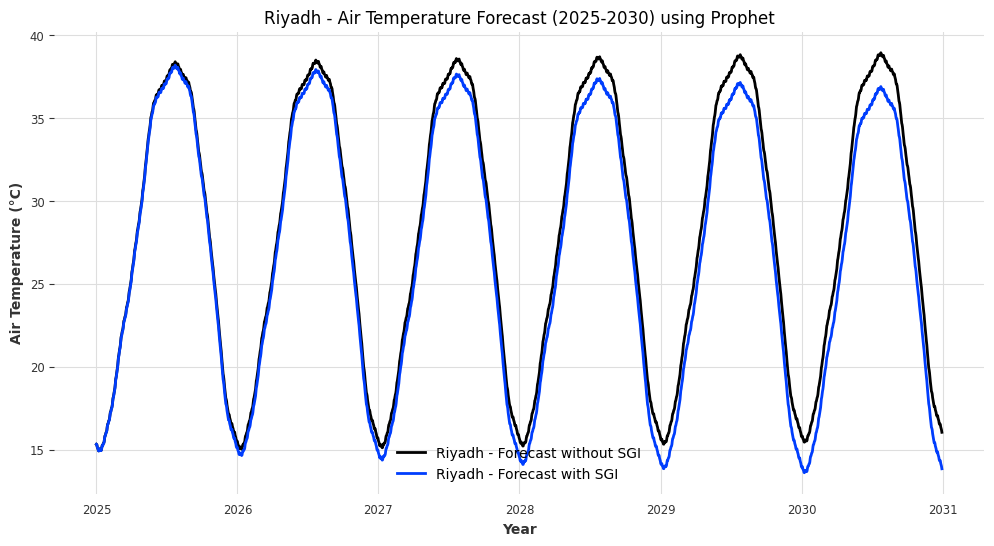

In [ ]:
plt.figure(figsize=(12, 6))
forecast_riyadh.plot(label="Riyadh - Forecast without SGI")
sgi_forecast_riyadh.plot(label="Riyadh - Forecast with SGI")
plt.title("Riyadh - Air Temperature Forecast (2025-2030) using Prophet")
plt.xlabel("Year")
plt.ylabel("Air Temperature (°C)")
plt.legend()
plt.show()

<Axes: xlabel='DATE_ONLY'>

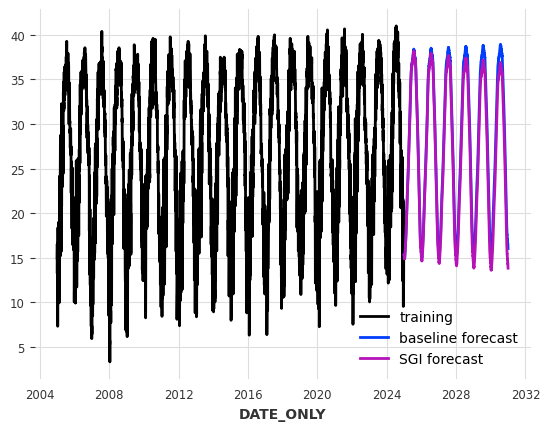

In [ ]:
ts_train_riyadh.plot(label="training")
forecast_riyadh.plot(label="baseline forecast")
sgi_forecast_riyadh.plot(label="SGI forecast")

### - Jeddah

In [ ]:
df_jeddah = df_jeddah.groupby("DATE_ONLY").mean().reset_index()

In [ ]:
ts_jeddah = TimeSeries.from_dataframe(
    df_jeddah,
    time_col="DATE_ONLY",
    value_cols="AIR_TEMPERATURE",
    fill_missing_dates=True,
    freq="D"
)


In [ ]:
ts_jeddah = fill_missing_values(ts_jeddah, method="linear")

ts_train_jeddah = ts_jeddah.slice(pd.Timestamp("2005-01-01"), pd.Timestamp("2024-12-31"))

In [ ]:
# train Prophet
model_jeddah = Prophet()
model_jeddah.fit(ts_train_jeddah)

20:48:46 - cmdstanpy - INFO - Chain [1] start processing
20:48:50 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_seasonalities=None, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None)

In [ ]:
#froecast
forecast_jeddah = model_jeddah.predict(n=6*365)

In [ ]:
#  SGI: - 2.2
avg_temp_jeddah = forecast_jeddah.mean().values()[0]
total_drop = 2.2
cumulative_drop = np.linspace(0, 2.2, len(forecast_riyadh))
adjusted_values_jeddah = forecast_jeddah.values().flatten() - cumulative_drop
sgi_forecast_jeddah = TimeSeries.from_times_and_values(forecast_jeddah.time_index, adjusted_values_jeddah)

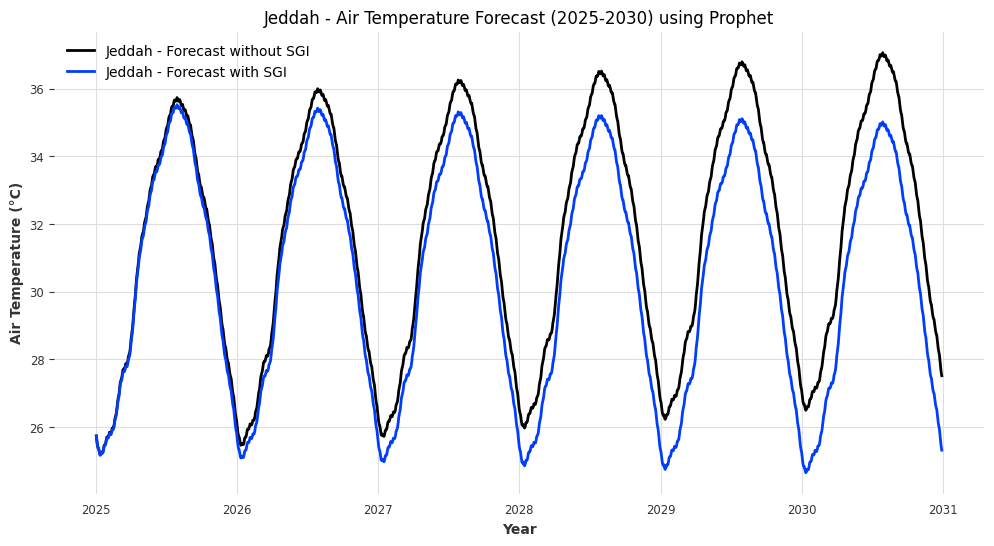

In [ ]:
plt.figure(figsize=(12, 6))
forecast_jeddah.plot(label="Jeddah - Forecast without SGI")
sgi_forecast_jeddah.plot(label="Jeddah - Forecast with SGI")
plt.title("Jeddah - Air Temperature Forecast (2025-2030) using Prophet")
plt.xlabel("Year")
plt.ylabel("Air Temperature (°C)")
plt.legend()
plt.show()

<Axes: xlabel='DATE_ONLY'>

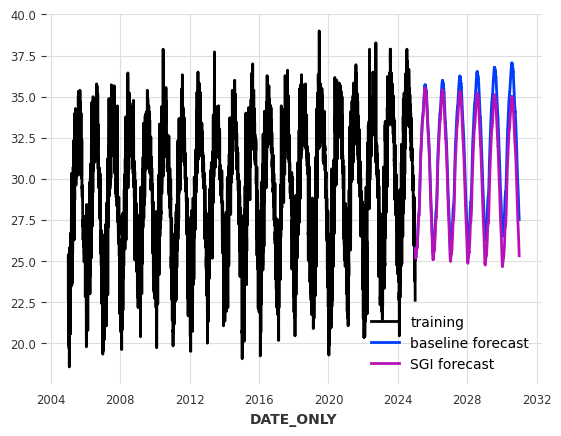

In [ ]:
ts_train_jeddah.plot(label="training")
forecast_jeddah.plot(label="baseline forecast")
sgi_forecast_jeddah.plot(label="SGI forecast")

# 📆 Step 6: Break Down Forecast by Seasons

In [ ]:
dates = forecast_riyadh.time_index
values = forecast_riyadh.values().flatten()  

In [ ]:
dfr_forecast = pd.DataFrame({"Date": dates, "Temperature": values})

In [ ]:
dfr_forecast["Month"] = dfr_forecast["Date"].dt.month

def get_season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"

dfr_forecast["Season"] = dfr_forecast["Month"].apply(get_season)

seasonal_summaryـriyadh= dfr_forecast.groupby("Season")["Temperature"].mean().reset_index()


In [ ]:
seasonal_summaryـriyadh

,Season,Temperature
0,Autumn,28.720907
1,Spring,28.419031
2,Summer,37.692415
3,Winter,17.070592


In [ ]:
dates_jeddah = forecast_jeddah.time_index
values_jeddah = forecast_jeddah.values().flatten()
dfj_forecast = pd.DataFrame({"Date": dates_jeddah, "Temperature": values_jeddah})

In [ ]:
dfj_forecast["Month"] = dfj_forecast["Date"].dt.month

def get_season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"

dfj_forecast["Season"] = dfj_forecast["Month"].apply(get_season)

seasonal_summaryـjeddah = dfj_forecast.groupby("Season")["Temperature"].mean().reset_index()


In [ ]:
seasonal_summaryـjeddah

,Season,Temperature
0,Autumn,32.637385
1,Spring,30.877122
2,Summer,35.612324
3,Winter,26.970988


# 📌 Conclusion & Reflections

This project began with a simple question: _what might rain look like in Saudi Arabia’s future?_ Through a combination of climate data analysis and time-series forecasting, we explored historical temperature and rainfall trends in Riyadh and Jeddah, and simulated future scenarios shaped by the Saudi Green Initiative (SGI).

Using Prophet for temperature prediction and Croston-based models for sparse rainfall patterns, we produced forecasts that not only highlight expected trends under a “business as usual” scenario, but also demonstrate the potential impact of SGI — including a gradual 2.2°C reduction in average temperature by 2030.

Key reflections:
- Sparse and irregular rainfall posed a challenge that required specialized models like Croston and TSB.
- The inclusion of seasonal breakdowns added depth to our interpretation, showing how each season may behave differently under changing conditions.
- Our Prophet-based models yielded strong validation performance, with MAPE values below 10%, suggesting robust predictive power.

Going forward, the methodology could be extended to include humidity, vegetation index, or wind speed as additional features — building a more holistic climate forecast model for the region.

This project has shown us how data science can turn raw environmental data into actionable climate insights. We hope it serves as a foundation for future explorations and policy-driven impact.